# DSI 11 Project 2: Ames Housing Data

## Business Problem:

To determine which features affect sales price of houses in Ames, Iowa in order to predict future sales price of houses.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Importing Data

In [2]:
# importing training data

train_data = pd.read_csv('./datasets/train.csv')
df_train = pd.DataFrame(train_data)

df_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [3]:
# importing test data
test_data = pd.read_csv('./datasets/test.csv')
df_test = pd.DataFrame(test_data)

df_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

## Data Cleaning

In [4]:
# cleaning up column names so that they will be easier to work with
df_train.columns = df_train.columns.str.replace(' ','_').str.lower()

In [5]:
# Checking for data types and missing data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id                 2051 non-null int64
pid                2051 non-null int64
ms_subclass        2051 non-null int64
ms_zoning          2051 non-null object
lot_frontage       1721 non-null float64
lot_area           2051 non-null int64
street             2051 non-null object
alley              140 non-null object
lot_shape          2051 non-null object
land_contour       2051 non-null object
utilities          2051 non-null object
lot_config         2051 non-null object
land_slope         2051 non-null object
neighborhood       2051 non-null object
condition_1        2051 non-null object
condition_2        2051 non-null object
bldg_type          2051 non-null object
house_style        2051 non-null object
overall_qual       2051 non-null int64
overall_cond       2051 non-null int64
year_built         2051 non-null int64
year_remod/add     2051 non-null int64
roof_style         20

In [6]:
# Another view for missing values so that it is easier to focus on them
df_train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [7]:
# Checking the missing values for lot_frontage.
df_train[df_train['lot_frontage'].isnull()]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      109  533352170           60        RL           NaN     13517   Pave   
7      145  535154050           20        RL           NaN     12160   Pave   
8     1942  535353130           20        RL           NaN     15783   Pave   
23      12  527165230           20        RL           NaN      7980   Pave   
27    1534  909277040           50        RL           NaN     11700   Pave   
31    2860  909276010           70        RL           NaN     11435   Pave   
42     983  923275040           85        RL           NaN      9101   Pave   
50    2511  533221080          160        FV           NaN      2998   Pave   
59     997  527107010           60        RL           NaN     15038   Pave   
62     230  905109170           20        RL           NaN     20062   Pave   
71    1564  914453045           20        RL           NaN     23730   Pave   
75    1360  903452025           30        RM           NaN      6291   Grvl   
76    2723  905200380           30        RL           NaN     17529   Pave   
90    1187  534127210           80        RL           NaN     11104   Pave   
91    2154  907280090           60        RL           NaN     15295   Pave   
94     124  534403410           80        RL           NaN     14112   Pave   
106   2513  533223080          160        FV           NaN      2651   Pave   
108   2309  526303060           20        RL           NaN     39384   Pave   
111   1881  534252110           20        RL           NaN     12342   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
117   1168  533215020          120        FV           NaN      4765   Pave   
118   1396  905226110          190        RL           NaN     10532   Pave   
122   1826  532377140           20        RL           NaN      9945   Pave   
125   1183  533350090           60        RL           NaN     24572   Pave   
141   2438  528275080           60        RL           NaN      8658   Pave   
142     89  532378110           20        RL           NaN      6897   Pave   
148   2132  907192040           60        RL           NaN      8826   Pave   
150    420  527455280           20        RL           NaN     10710   Pave   
160   2067  905226050           30        RL           NaN     25339   Pave   
161   2115  906403060           60        RL           NaN      8883   Pave   
166   1320  902401010           50        RM           NaN      5700   Pave   
169   1385  905108170           85        RL           NaN      7400   Pave   
176   2432  528235050           60        RL           NaN      7861   Pave   
177    777  905200220           20        RL           NaN     11616   Pave   
192    988  924100040           20        RL           NaN      9819   Pave   
200   2287  923228200          180        RM           NaN      1533   Pave   
208   2421  528228325          120        RL           NaN      3196   Pave   
210     24  527402200           20        RL           NaN     11241   Pave   
221   2542  534275010           20        RL           NaN     10659   Pave   
223   1393  905202230           20        RL           NaN     13500   Pave   
226    973  923203190          120        RM           NaN      4500   Pave   
236   1896  534425015           20        RL           NaN     22002   Pave   
250   1105  528363020           60        RL           NaN     11929   Pave   
253    265  907252120           20        RL           NaN     11423   Pave   
262   1599  923227030           20        RL           NaN     17979   Pave   
268   1863  534104090           60        FV           NaN      7050   Pave   
284   1629  527165100           80        RL           NaN      9125   Pave   
285   2073  905352010           20        RL           NaN     11075   Pave   
290   2913  923226150           90        RL           NaN     11836   Pave   
293   1470  907290250          120        RM           NaN

In [8]:
# Checking values of lot_frontage 
df_train.lot_frontage.unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [9]:
# Checking the values for alley column. Only gravel and paved were observed. There are no NA values.
# We will assume the missing valleys represent that these data points have no alley access
df_train.alley.value_counts()

Grvl    85
Pave    55
Name: alley, dtype: int64

In [10]:
# Checking values present in mas_vnr_type
df_train.mas_vnr_type.value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [11]:
# seems like all the missing mas_vnr_type are also missing the mas_vnr_area. Will threrefore remove these rows
# as we are unable to determine which group they belong to
df_train[df_train['mas_vnr_type'].isnull()]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
86     539  531371050           20        RL          67.0     10083   Pave   
212    518  528458020           20        FV          90.0      7993   Pave   
276   2824  908130020           20        RL          75.0      8050   Pave   
338   1800  528458150           60        FV         112.0     12217   Pave   
431   1455  907251090           60        RL          75.0      9473   Pave   
451   1120  528439010           20        RL          87.0     10037   Pave   
591   1841  533208040          120        FV          35.0      4274   Pave   
844   1840  533208030          120        FV          30.0      5330   Pave   
913   2230  909475070           20        RL           NaN     32668   Pave   
939   1123  528462040           20        FV          95.0     11639   Pave   
1025  1784  528435010           20        RL          85.0      9965   Pave   
1244   485  528275160           60        RL           NaN     12891   Pave   
1306  1752  528250010           80        RL           NaN     11950   Pave   
1430  1185  534104100           60        FV           NaN      7500   Pave   
1434  1128  528480160           60        FV          65.0      8125   Pave   
1606  1096  528290090           60        RL           NaN      7750   Pave   
1699  2261  916384070           20        RL          68.0      8298   Pave   
1815  2456  528429100           20        RL          49.0     15218   Pave   
1820  1728  528218010           60        RL          59.0     15810   Pave   
1941    56  528240070           60        RL           NaN      7851   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
22     NaN       IR1          Lvl    AllPub     Corner        Gtl   
41     NaN       Reg          Lvl    AllPub     Inside        Gtl   
86     NaN       Reg          Lvl    AllPub     Inside        Gtl   
212    NaN       IR1          Lvl    AllPub     Inside        Gtl   
276    NaN       Reg          Lvl    AllPub     Inside        Gtl   
338    NaN       IR1          Lvl    AllPub     Inside        Gtl   
431    NaN       Reg          Lvl    AllPub     Inside        Gtl   
451    NaN       Reg          Lvl    AllPub     Corner        Gtl   
591   Pave       IR1          Lvl    AllPub     Inside        Gtl   
844   Pave       IR2          Lvl    AllPub     Inside        Gtl   
913    NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
939    NaN       Reg          Lvl    AllPub     Corner        Gtl   
1025   NaN       Reg          Lvl    AllPub        FR2        Gtl   
1244   NaN       IR1          Lvl    AllPub     Corner        Gtl   
1306   NaN       IR1          Lvl    AllPub     Corner        Gtl   
1430   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1434   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1606   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1699   NaN       IR1          HLS    AllPub     Inside        Gtl   
1815   NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
1820   NaN       IR1          Lvl    AllPub     Inside        Gtl   
1941   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
22        NridgHt        Norm        Norm      1Fam      2Story             8   
41        NridgHt        Norm        Norm      1Fam      1Story            10   
86        SawyerW        Norm        Norm      1Fam      1Story             7   
212       Somerst        Norm        Norm      1Fam      1Story             7   
276       Edwards        Norm        Norm      1Fam      1Story             6   
338       Somerst        Norm        Norm      1Fam      2Story             8   
431       CollgCr        Norm      

In [12]:
# removing rows with missing mas_vnr_type and mas_vnr_area
df_train.dropna(subset=['mas_vnr_type'], inplace=True)

In [13]:
# checking value counts of mas_vnr_area. There are 1216 rows with value of 0, but there are 1218 with no
# mas_vnr_type.
df_train.mas_vnr_area.value_counts()

0.0       1216
120.0       11
176.0       10
200.0       10
180.0        9
72.0         9
210.0        9
16.0         9
108.0        9
40.0         8
132.0        8
170.0        7
144.0        7
186.0        7
340.0        6
84.0         6
256.0        6
203.0        6
128.0        6
140.0        6
60.0         6
178.0        6
112.0        5
143.0        5
148.0        5
164.0        5
174.0        5
216.0        5
300.0        5
302.0        5
320.0        5
252.0        5
504.0        5
145.0        5
160.0        5
106.0        5
260.0        5
288.0        5
168.0        5
44.0         5
360.0        5
76.0         5
272.0        5
513.0        4
192.0        4
130.0        4
126.0        4
232.0        4
183.0        4
68.0         4
456.0        4
240.0        4
50.0         4
172.0        4
336.0        4
30.0         4
196.0        4
80.0         4
136.0        4
246.0        4
270.0        4
242.0        4
162.0        3
125.0        3
248.0        3
158.0        3
220.0     

In [14]:
# Checking for rows where mas_vnr_type and mas_vnr_area data do not match. Will remove these rows
df_train[((df_train['mas_vnr_type']=='None') & (df_train['mas_vnr_area']!=0)) |
        ((df_train['mas_vnr_type']!='None') & (df_train['mas_vnr_area']==0))]

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
669   1741  528222090           20        RL          64.0      7697   Pave   
765   1862  533352075           90        RL           NaN     18890   Pave   
810   2529  534129230           60        RL          80.0     10400   Pave   
1136  1641  527252070           20        RL          60.0      8089   Pave   
1148  1914  535106140           20        RL          70.0     10150   Pave   
1187  1786  528435060           20        RL          83.0      9849   Pave   
1684  2004  902427140           20        RM          52.0      8626   Pave   
1832   364  527166010           60        RL           NaN     10762   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
669    NaN       Reg          Lvl    AllPub     Inside        Gtl   
765    NaN       IR1          Lvl    AllPub     Inside        Gtl   
810    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1136   NaN       Reg          HLS    AllPub     Inside        Gtl   
1148   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1187   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1684   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1832   NaN       IR1          Lvl    AllPub    CulDSac        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
669       Gilbert        Norm        Norm      1Fam      1Story             7   
765        Sawyer       Feedr        RRAe    Duplex      1.5Fin             5   
810        NWAmes        Norm        Norm      1Fam      2Story             6   
1136      StoneBr        Norm        Norm      1Fam      1Story             8   
1148        NAmes       Feedr        Norm      1Fam      1Story             5   
1187      Somerst        Norm        Norm      1Fam      1Story             7   
1684      OldTown        Norm        Norm      1Fam      1Story             4   
1832      Gilbert        Norm        Norm      1Fam      2Story             7   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
669              6        2007            2007      Gable   CompShg   
765              5        1977            1977       Shed   CompShg   
810              5        1972            1972      Gable   CompShg   
1136             6        2007            2007      Gable   CompShg   
1148             5        1958            1958      Gable   CompShg   
1187             6        2007            2007        Hip   CompShg   
1684             6        1956            1956      Gable   CompShg   
1832             5        1999            1999      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
669       VinylSd      VinylSd      BrkFace           0.0         Gd   
765       Plywood      Plywood         None           1.0         TA   
810       VinylSd      VinylSd         None         288.0         TA   
1136      MetalSd      MetalSd      BrkFace           0.0         Gd   
1148      Wd Sdng      Wd Sdng         None           1.0         TA   
1187      VinylSd      VinylSd        Stone           0.0         Gd   
1684      MetalSd      MetalSd         None           1.0         TA   
1832      VinylSd      VinylSd         None         344.0         Gd   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
669          TA      PConc        Gd        TA            No            Unf   
765          TA     CBlock        Gd        TA            No            GLQ   
810          TA     CBlock        TA        TA            No            Rec   
1136         TA      PConc        Gd        TA            Av            GLQ   
1148         TA     CBlock        TA        TA            No            Rec   
1187         TA      PConc        Gd        TA            Av            Unf   
1684         TA     CBlock       NaN       NaN           NaN            NaN   
1832         TA      PC

In [15]:
# removing errornous mas_vnr_type and mas_vnr_area
mas_vnr_error_index = list(df_train[((df_train['mas_vnr_type']=='None') & (df_train['mas_vnr_area']!=0)) |
        ((df_train['mas_vnr_type']!='None') & (df_train['mas_vnr_area']==0))].index.values)

df_train.drop(mas_vnr_error_index, inplace=True)

In [16]:
# Checking values present in bsmt_qual
df_train.bsmt_qual.value_counts()

TA    884
Gd    845
Ex    177
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [17]:
# Checking values present in bsmt_cond
df_train.bsmt_cond.value_counts()

TA    1807
Gd      87
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [18]:
# Checking for null values in bsmt_exposure
df_train[df_train['bsmt_exposure'].isnull()]

# Based on observation, there are three rows with basement but the value for bsmt_exposure is missing.
# Will remove these three rows. The remaining will be replaced with NA as they have no basement.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
12     807  906226060           70        RL         120.0     26400   Pave   
93     811  906226100           90        RL          64.0      7018   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
146    888  908128060           85        RL          64.0      7301   Pave   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   
240   2740  905451050           20        RL          80.0     12048   Pave   
249   2242  910206010           50        RM          64.0     11067   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
390     84  532351140           90        RM          68.0      8930   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
485    155  535327140           20        RL          60.0      7200   Pave   
499    812  906226110           90        RL          64.0      7018   Pave   
514   2082  905475520           30        RL           NaN     11515   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
581    946  912251110           30   I (all)         109.0     21780   Grvl   
616   1498  908154080           20        RL         123.0     47007   Pave   
635   2904  923125030           20   A (agr)         125.0     31250   Pave   
642    953  914476020           90        RL          75.0     10125   Pave   
696    274  908102060           30        RL          67.0      8777   Pave   
700    207  903454060          190        RM          70.0      5600   Pave   
737    788  905402070           20        RL           NaN     15635   Pave   
772    679  535451170           90        RL          60.0      7200   Pave   
790   1205  534276190           20        RL          74.0      7785   Pave   
794   1255  535375140           20        RL          60.0     10122   Pave   
924    677  535450160           90        RL          60.0      8544   Pave   
933   1375  904101170           50        RL          80.0     17120   Pave   
954   2622  535451190           20        RL          60.0      7200   Pave   
1007  1880  534252070           90        RL           NaN     10899   Pave   
1022  2703  904301410           30        RL          55.0      8250   Pave   
1049  2177  908152180           90        RL           NaN      9555   Pave   
1089   709  902205010           30        RM          50.0      5925   Pave   
1098  1260  535383100          190        RL          60.0     10800   Pave   
1125  2626  535454050           90        RL           NaN      8544   Pave   
1157   897  908225370           50        RL          50.0      8405   Pave   
1211  2893  916252170          120        RM           NaN      8239   Pave   
1222  1326  902427045           20        RM          70.0     12702   Pave   
1252   244  905478190           20        RL          60.0     11100   Pave   
1256   813  906226120           90        RL          64.0      7018   Pave   
1270  1569  914476080           90        RL          76.0     10260   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   
1331   650  535353060           20        RL          75.0      9533   Pave   
1377  2707  905101330           90        RL          72.0     10791   Pave   
1387   787  905402060           20        RL           NaN     13680   Pave   
1428  1902  534450090           20        RL          50.0      5000   Pave   
1456  1797  528458090           60        FV          81.0     10411   Pave   
1481  2701  904100170           20        RL         100.0     21370   Pave   
1547    67  528445060           20        RL          73.0      8987   Pave   
1594  1502  908201110           90        RL          65.0      6012   Pave   
1620   815  906226140           90        RL          64.0      7007   Pave   
1681  1899  534429030           90        RL          70.0

In [19]:
# creating index for filling in the NaN values later this index will refer to No exposure
no_bsmt_exposure_index = list(df_train[(df_train['bsmt_cond']!='NA') &
                                          (df_train['bsmt_exposure'].isnull())].index.values)


In [20]:
# checking missing values for bsmtfin_type_1
df_train[df_train['bsmtfin_type_1'].isnull()]

# from observation, it seems that all the missing values do not have basements

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
12     807  906226060           70        RL         120.0     26400   Pave   
93     811  906226100           90        RL          64.0      7018   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
146    888  908128060           85        RL          64.0      7301   Pave   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   
240   2740  905451050           20        RL          80.0     12048   Pave   
249   2242  910206010           50        RM          64.0     11067   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
390     84  532351140           90        RM          68.0      8930   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
485    155  535327140           20        RL          60.0      7200   Pave   
499    812  906226110           90        RL          64.0      7018   Pave   
514   2082  905475520           30        RL           NaN     11515   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
581    946  912251110           30   I (all)         109.0     21780   Grvl   
616   1498  908154080           20        RL         123.0     47007   Pave   
635   2904  923125030           20   A (agr)         125.0     31250   Pave   
642    953  914476020           90        RL          75.0     10125   Pave   
696    274  908102060           30        RL          67.0      8777   Pave   
700    207  903454060          190        RM          70.0      5600   Pave   
737    788  905402070           20        RL           NaN     15635   Pave   
772    679  535451170           90        RL          60.0      7200   Pave   
790   1205  534276190           20        RL          74.0      7785   Pave   
794   1255  535375140           20        RL          60.0     10122   Pave   
924    677  535450160           90        RL          60.0      8544   Pave   
933   1375  904101170           50        RL          80.0     17120   Pave   
954   2622  535451190           20        RL          60.0      7200   Pave   
1007  1880  534252070           90        RL           NaN     10899   Pave   
1022  2703  904301410           30        RL          55.0      8250   Pave   
1049  2177  908152180           90        RL           NaN      9555   Pave   
1089   709  902205010           30        RM          50.0      5925   Pave   
1098  1260  535383100          190        RL          60.0     10800   Pave   
1125  2626  535454050           90        RL           NaN      8544   Pave   
1157   897  908225370           50        RL          50.0      8405   Pave   
1211  2893  916252170          120        RM           NaN      8239   Pave   
1222  1326  902427045           20        RM          70.0     12702   Pave   
1252   244  905478190           20        RL          60.0     11100   Pave   
1256   813  906226120           90        RL          64.0      7018   Pave   
1270  1569  914476080           90        RL          76.0     10260   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   
1331   650  535353060           20        RL          75.0      9533   Pave   
1377  2707  905101330           90        RL          72.0     10791   Pave   
1387   787  905402060           20        RL           NaN     13680   Pave   
1428  1902  534450090           20        RL          50.0      5000   Pave   
1481  2701  904100170           20        RL         100.0     21370   Pave   
1594  1502  908201110           90        RL          65.0      6012   Pave   
1620   815  906226140           90        RL          64.0      7007   Pave   
1681  1899  534429030           90        RL          70.0      9842   Pave   
1686  2627  535454060           90        RL          60.0      8544   Pave   
1859  2625  535454030           90        RL          60.0

In [21]:
# Checking missing value for bsmtfin_sf_1
df_train[df_train['bsmtfin_sf_1'].isnull()]

# Since the house does not have basment, finished square feet will be 0

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327   NaN       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc       NaN       NaN           NaN            NaN   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN            NaN           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

In [22]:
# checking missing values for bsmtfin_type_2 
df_train[df_train['bsmtfin_type_2'].isnull()]

# row 1147 has data for the other columns regarding basement type 2, but this particular column is missing.
# Since we are unable to determine what should be here, we will delete row. The remaining rows do not have basement

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
12     807  906226060           70        RL         120.0     26400   Pave   
93     811  906226100           90        RL          64.0      7018   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
146    888  908128060           85        RL          64.0      7301   Pave   
183   1554  910251050           20   A (agr)          80.0     14584   Pave   
240   2740  905451050           20        RL          80.0     12048   Pave   
249   2242  910206010           50        RM          64.0     11067   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
390     84  532351140           90        RM          68.0      8930   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
485    155  535327140           20        RL          60.0      7200   Pave   
499    812  906226110           90        RL          64.0      7018   Pave   
514   2082  905475520           30        RL           NaN     11515   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
581    946  912251110           30   I (all)         109.0     21780   Grvl   
616   1498  908154080           20        RL         123.0     47007   Pave   
635   2904  923125030           20   A (agr)         125.0     31250   Pave   
642    953  914476020           90        RL          75.0     10125   Pave   
696    274  908102060           30        RL          67.0      8777   Pave   
700    207  903454060          190        RM          70.0      5600   Pave   
737    788  905402070           20        RL           NaN     15635   Pave   
772    679  535451170           90        RL          60.0      7200   Pave   
790   1205  534276190           20        RL          74.0      7785   Pave   
794   1255  535375140           20        RL          60.0     10122   Pave   
924    677  535450160           90        RL          60.0      8544   Pave   
933   1375  904101170           50        RL          80.0     17120   Pave   
954   2622  535451190           20        RL          60.0      7200   Pave   
1007  1880  534252070           90        RL           NaN     10899   Pave   
1022  2703  904301410           30        RL          55.0      8250   Pave   
1049  2177  908152180           90        RL           NaN      9555   Pave   
1089   709  902205010           30        RM          50.0      5925   Pave   
1098  1260  535383100          190        RL          60.0     10800   Pave   
1125  2626  535454050           90        RL           NaN      8544   Pave   
1147   445  528142130           20        RL          85.0     10655   Pave   
1157   897  908225370           50        RL          50.0      8405   Pave   
1211  2893  916252170          120        RM           NaN      8239   Pave   
1222  1326  902427045           20        RM          70.0     12702   Pave   
1252   244  905478190           20        RL          60.0     11100   Pave   
1256   813  906226120           90        RL          64.0      7018   Pave   
1270  1569  914476080           90        RL          76.0     10260   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   
1331   650  535353060           20        RL          75.0      9533   Pave   
1377  2707  905101330           90        RL          72.0     10791   Pave   
1387   787  905402060           20        RL           NaN     13680   Pave   
1428  1902  534450090           20        RL          50.0      5000   Pave   
1481  2701  904100170           20        RL         100.0     21370   Pave   
1594  1502  908201110           90        RL          65.0      6012   Pave   
1620   815  906226140           90        RL          64.0      7007   Pave   
1681  1899  534429030           90        RL          70.0      9842   Pave   
1686  2627  535454060           90        RL          60.0

In [23]:
# Cleaning up bsmtfin_type_2 column
df_train.drop(1147, inplace=True)

In [24]:
# checking missing data for bsmtfin_sf_2 
df_train[df_train['bsmtfin_sf_2'].isnull()]

# Seems like this particular house has no basement. Therefore values for bsmtfin_sf_2, bsmt_unf_sf and
# total_bsmt_sf should be 0.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
1327   NaN       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
1327         TA      PConc       NaN       NaN           NaN            NaN   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
1327           NaN            NaN           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
1327     2008     ConLD      79000

In [25]:
# checking for missing values in bsmt_full_bath
df_train[df_train['bsmt_full_bath'].isnull()]

# These 2 houses do not have basements, makes sense that they do not have bathrooms in the non-existent basement.

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
616   1498  908154080           20        RL         123.0     47007   Pave   
1327  1342  903230120           20        RM          99.0      5940   Pave   

     alley lot_shape land_contour utilities lot_config land_slope  \
616    NaN       IR1          Lvl    AllPub     Inside        Gtl   
1327   NaN       IR1          Lvl    AllPub        FR3        Gtl   

     neighborhood condition_1 condition_2 bldg_type house_style  overall_qual  \
616       Edwards        Norm        Norm      1Fam      1Story             5   
1327      BrkSide       Feedr        Norm      1Fam      1Story             4   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
616              7        1959            1996      Gable   CompShg   
1327             7        1946            1950      Gable   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
616       Plywood      Plywood         None           0.0         TA   
1327      MetalSd       CBlock         None           0.0         TA   

     exter_cond foundation bsmt_qual bsmt_cond bsmt_exposure bsmtfin_type_1  \
616          TA       Slab       NaN       NaN           NaN            NaN   
1327         TA      PConc       NaN       NaN           NaN            NaN   

      bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  \
616            0.0            NaN           0.0          0.0            0.0   
1327           NaN            NaN           NaN          NaN            NaN   

     heating heating_qc central_air electrical  1st_flr_sf  2nd_flr_sf  \
616     GasA         TA           Y      SBrkr        3820           0   
1327    GasA         TA           Y      FuseA         896           0   

      low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
616                 0         3820             NaN             NaN          3   
1327                0          896             NaN             NaN          1   

      half_bath  bedroom_abvgr  kitchen_abvgr kitchen_qual  totrms_abvgrd  \
616           1              5              1           Ex             11   
1327          0              2              1           TA              4   

     functional  fireplaces fireplace_qu garage_type  garage_yr_blt  \
616         Typ           2           Gd      Attchd         1959.0   
1327        Typ           0          NaN      Detchd         1946.0   

     garage_finish  garage_cars  garage_area garage_qual garage_cond  \
616            Unf          2.0        624.0          TA          TA   
1327           Unf          1.0        280.0          TA          TA   

     paved_drive  wood_deck_sf  open_porch_sf  enclosed_porch  3ssn_porch  \
616            Y             0            372               0           0   
1327           Y             0              0               0           0   

      screen_porch  pool_area pool_qc  fence misc_feature  misc_val  mo_sold  \
616              0          0     NaN    NaN          NaN         0        7   
1327             0          0     NaN  MnPrv          NaN         0        4   

      yr_sold sale_type  saleprice  
616      2008       WD      284700  
1327     2008     ConLD      79000

In [26]:
# exploring missing values related to fireplace quality
df_train.fireplace_qu.isnull().sum()

988

In [27]:
df_train.fireplaces.value_counts()
# seeing that we have 987 missing values for fireplace_qu and 987 houses with 0 fireplaces, we can safely replace
# the missing values in fireplace_qu with NA

0    988
1    881
2    144
3      6
4      1
Name: fireplaces, dtype: int64

In [28]:
# checking to see how many null values are left
df_train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        322
lot_area              0
street                0
alley              1882
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            54
bsmt_cond            54
bsmt_exposure        57
bsmtfin_type_1       54
bsmtfin_sf_1          1
bsmtfin_type_2       54
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [29]:
# checking missing values for garage_type
df_train[(df_train['garage_type'].isnull())]

# all the missing values have 0 garage area. Therefore safe to say that they have no garage

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
28    2243  911103060          190   C (all)          75.0      8250   Pave   
53     330  923226250          160        RM          21.0      1476   Pave   
65    2278  923202134           20        RL          70.0      8402   Pave   
79    2235  910201050           50        RM          50.0      7288   Pave   
101   2084  905476170           30        RL          58.0      9098   Pave   
103    728  902477130           30   C (all)          72.0      9392   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
120   1492  908127120           30        RL          63.0     13907   Pave   
134   1514  909100170           30        RL          67.0      5604   Pave   
136    216  905101100           50        RL          54.0      6342   Pave   
139    204  903426200           70        RM          60.0     12900   Pave   
162    754  903430070           90        RM          50.0      3000   Pave   
235    698  902105060           70        RM          90.0      9900   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
260    131  534451150           30        RL          55.0      5350   Pave   
264    615  534450150           30        RL          50.0      5330   Pave   
334   2846  909131125          190        RH           NaN      7082   Pave   
356    943  911103050           50   C (all)         105.0      8470   Pave   
382    753  903430060           75        RM          92.0      5520   Pave   
406   2369  527451200          160        RM          21.0      1680   Pave   
409   2034  903454010           70        RM          60.0      6882   Pave   
426   2882  911175440          190   C (all)          50.0      9000   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
445   2635  535478110          190        RL          70.0      7000   Pave   
457   1951  535379110           70        RL          60.0     10800   Pave   
486   1318  902328040           75        RM          35.0      6300   Pave   
530    900  908275040           90        RL          65.0     10926   Pave   
542   1376  904351280          190        RL          62.0     10106   Pave   
555   1366  903458110           50        RM           NaN      7920   Pave   
562    187  902401060          190        RM         100.0      9045   Pave   
579    218  905101310           90        RL          72.0     10778   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
612   2670  902456015           50   C (all)          63.0      4761   Pave   
636   2174  908127100           90        RL          81.0     11841   Grvl   
653   1417  905480150           50        RL          60.0      9600   Pave   
663   2187  908225310           90        RL          52.0      8741   Pave   
689   1415  905477050          190        RL          70.0      7000   Pave   
692   2883  911225110           50   C (all)          60.0      8520   Grvl   
700    207  903454060          190        RM          70.0      5600   Pave   
705   1292  902109080          190        RM          63.0     11426   Pave   
708   2875  910203100           30        RM          61.0      8534   Pave   
722   1135  531375050           20        RL          63.0     13072   Pave   
736    172  902106130           30        RM          56.0      4485   Pave   
741   2471  531363080           20        RL          74.0      7733   Pave   
783   2621  535450180           50        RL          60.0     10800   Pave   
787   1600  923228080          160        RM          21.0      1477   Pave   
791    763  904301060           90        RL          60.0     10800   Pave   
814   1515  909101060           30        RL          45.0      8248   Pave   
822   1516  909101180          190        RL          55.0      5687   Pave   
824   1808  531363040           20        RL          63.0

In [30]:
# Checking missing values in garage_yr_blt
df_train[df_train['garage_yr_blt'].isnull()]

# index 1712, id 2237 has a garage_type but the remaining garage details(garage_yr_blt, garage_finish, garage_cars,
# garage_area, garage_qual, garage_cond) are missing. Will remove data point.
# Will replace the year built for the other data points as 0 as they have no garage

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
28    2243  911103060          190   C (all)          75.0      8250   Pave   
53     330  923226250          160        RM          21.0      1476   Pave   
65    2278  923202134           20        RL          70.0      8402   Pave   
79    2235  910201050           50        RM          50.0      7288   Pave   
101   2084  905476170           30        RL          58.0      9098   Pave   
103    728  902477130           30   C (all)          72.0      9392   Pave   
114    781  905228050           20        RL           NaN      9000   Pave   
120   1492  908127120           30        RL          63.0     13907   Pave   
134   1514  909100170           30        RL          67.0      5604   Pave   
136    216  905101100           50        RL          54.0      6342   Pave   
139    204  903426200           70        RM          60.0     12900   Pave   
162    754  903430070           90        RM          50.0      3000   Pave   
235    698  902105060           70        RM          90.0      9900   Pave   
256   2745  905477010           20        RL          77.0      8335   Pave   
260    131  534451150           30        RL          55.0      5350   Pave   
264    615  534450150           30        RL          50.0      5330   Pave   
334   2846  909131125          190        RH           NaN      7082   Pave   
356    943  911103050           50   C (all)         105.0      8470   Pave   
382    753  903430060           75        RM          92.0      5520   Pave   
406   2369  527451200          160        RM          21.0      1680   Pave   
409   2034  903454010           70        RM          60.0      6882   Pave   
426   2882  911175440          190   C (all)          50.0      9000   Pave   
437   1501  908201100           90        RL          65.0      6040   Pave   
445   2635  535478110          190        RL          70.0      7000   Pave   
457   1951  535379110           70        RL          60.0     10800   Pave   
486   1318  902328040           75        RM          35.0      6300   Pave   
530    900  908275040           90        RL          65.0     10926   Pave   
542   1376  904351280          190        RL          62.0     10106   Pave   
555   1366  903458110           50        RM           NaN      7920   Pave   
562    187  902401060          190        RM         100.0      9045   Pave   
579    218  905101310           90        RL          72.0     10778   Pave   
580   1504  908204160           90        RL          74.0      6845   Pave   
612   2670  902456015           50   C (all)          63.0      4761   Pave   
636   2174  908127100           90        RL          81.0     11841   Grvl   
653   1417  905480150           50        RL          60.0      9600   Pave   
663   2187  908225310           90        RL          52.0      8741   Pave   
689   1415  905477050          190        RL          70.0      7000   Pave   
692   2883  911225110           50   C (all)          60.0      8520   Grvl   
700    207  903454060          190        RM          70.0      5600   Pave   
705   1292  902109080          190        RM          63.0     11426   Pave   
708   2875  910203100           30        RM          61.0      8534   Pave   
722   1135  531375050           20        RL          63.0     13072   Pave   
736    172  902106130           30        RM          56.0      4485   Pave   
741   2471  531363080           20        RL          74.0      7733   Pave   
783   2621  535450180           50        RL          60.0     10800   Pave   
787   1600  923228080          160        RM          21.0      1477   Pave   
791    763  904301060           90        RL          60.0     10800   Pave   
814   1515  909101060           30        RL          45.0      8248   Pave   
822   1516  909101180          190        RL          55.0      5687   Pave   
824   1808  531363040           20        RL          63.0

In [31]:
# Cleaning garage_yr_blt column
df_train.drop(1712, inplace=True)

In [32]:
# Checking missing values for pool_qc
df_train.pool_qc.isnull().sum()

2010

In [33]:
# checking how many data points have value of 0 for pool_area
df_train.pool_area.value_counts()

# matches with the missing values for pool_qc -> missing values in pool_qc = no pool

0      2010
800       1
738       1
648       1
576       1
561       1
519       1
480       1
368       1
228       1
Name: pool_area, dtype: int64

In [34]:
# checking values for fence
df_train.fence.value_counts()

# We will assume that missing values for fence = no fence

MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [35]:
# Checking missing values for misc_feature
df_train.misc_feature.isnull().sum()

1955

In [36]:
# checking misc_val to see how many data points have $0 value for misc feature
df_train.misc_val.value_counts()

# Therefore missing values in misc_feature = no misc feature

0        1955
400        12
500         8
600         6
2000        5
450         5
700         4
2500        2
3000        2
4500        2
1200        2
54          1
80          1
12500       1
300         1
6500        1
3500        1
1300        1
455         1
480         1
1500        1
17000       1
650         1
800         1
900         1
1150        1
460         1
Name: misc_val, dtype: int64

In [37]:
# filling up all missing values
df_train.lot_frontage.fillna(0, inplace=True)
df_train.alley.fillna('NA', inplace=True)
df_train.mas_vnr_type.fillna('None', inplace=True)
df_train.mas_vnr_area.fillna(0, inplace=True)
df_train.bsmt_qual.fillna('NA', inplace=True)
df_train.bsmt_cond.fillna('NA', inplace=True)
df_train.loc[no_bsmt_exposure_index,'bsmt_exposure'].fillna('No', inplace=True)
df_train.bsmt_exposure.fillna('NA', inplace=True)
df_train.bsmtfin_type_1.fillna('NA', inplace=True)
df_train.bsmtfin_sf_1.fillna(0, inplace=True)
df_train.bsmtfin_type_2.fillna('NA', inplace=True)
df_train.bsmtfin_sf_2.fillna(0, inplace=True)
df_train.bsmt_unf_sf.fillna(0, inplace=True)
df_train.total_bsmt_sf.fillna(0, inplace=True)
df_train.bsmt_full_bath.fillna(0, inplace=True)
df_train.bsmt_half_bath.fillna(0, inplace=True)
df_train.fireplace_qu.fillna('NA', inplace=True)
df_train.garage_type.fillna('NA', inplace=True)
df_train.garage_yr_blt.fillna(0, inplace=True)
df_train.garage_finish.fillna('NA', inplace=True)
df_train.garage_qual.fillna('NA', inplace=True)
df_train.garage_cond.fillna('NA', inplace=True)
df_train.pool_qc.fillna('NA', inplace=True)
df_train.fence.fillna('NA', inplace=True)
df_train.misc_feature.fillna('NA', inplace=True)


In [38]:
df_train.isnull().sum()

id                 0
pid                0
ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area  

In [39]:
# changing most ordinal columns to values
df_train.lot_shape = df_train.lot_shape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
df_train.utilities = df_train.utilities.map({'AllPub': 1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
df_train.land_slope = df_train.land_slope.map({'Gtl':1 , 'Mod':2, 'Sev':3})
df_train.exter_qual = df_train.exter_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_train.exter_cond = df_train.exter_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_train.bsmt_qual = df_train.bsmt_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_train.bsmt_cond = df_train.bsmt_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_train.bsmt_exposure = df_train.bsmt_exposure.map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
df_train.bsmtfin_type_1 = df_train.bsmtfin_type_1.map({'GLQ':1 , 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
df_train.bsmtfin_type_2 = df_train.bsmtfin_type_2.map({'GLQ':1 , 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
df_train.heting_qc = df_train.heating_qc.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_train.kitchen_qual = df_train.kitchen_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_train.functional = df_train.functional.map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
df_train.fireplace_qu = df_train.fireplace_qu.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_train.garage_finish = df_train.garage_finish.map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
df_train.garage_qual = df_train.garage_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_train.garage_cond = df_train.garage_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_train.paved_drive = df_train.paved_drive.map({'Y':1, 'P':2, 'N':3})
df_train.pool_qc = df_train.pool_qc.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})


/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [40]:
df_train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street alley  \
0  109  533352170           60        RL           0.0     13517   Pave    NA   
1  544  531379050           60        RL          43.0     11492   Pave    NA   
2  153  535304180           20        RL          68.0      7922   Pave    NA   
3  318  916386060           60        RL          73.0      9802   Pave    NA   
4  255  906425045           50        RL          82.0     14235   Pave    NA   

   lot_shape land_contour  utilities lot_config  land_slope neighborhood  \
0          2          Lvl          1    CulDSac           1       Sawyer   
1          2          Lvl          1    CulDSac           1      SawyerW   
2          1          Lvl          1     Inside           1        NAmes   
3          1          Lvl          1     Inside           1       Timber   
4          2          Lvl          1     Inside           1      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area  exter_qual  exter_cond foundation  bsmt_qual  \
0      BrkFace         289.0           2           3     CBlock          3   
1      BrkFace         132.0           2           3      PConc          2   
2         None           0.0           3           2     CBlock          3   
3         None           0.0           3           3      PConc          2   
4         None           0.0           3           3      PConc          4   

   bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  \
0          3              4               1         533.0               6   
1          3              4               1         637.0               6   
2          3              4               1         731.0               6   
3          3              4               6           0.0               6   
4          2              4               6           0.0               6   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0     

## EDA

In [41]:
# looking at some statistics of our continuous data
df_train.describe()

id           pid  ms_subclass  lot_frontage       lot_area  \
count  2019.000000  2.019000e+03  2019.000000   2019.000000    2019.000000   
mean   1472.373947  7.153783e+08    57.189203     57.998019   10052.344725   
std     845.842180  1.887230e+08    42.979492     33.081978    6766.807652   
min       1.000000  5.263011e+08    20.000000      0.000000    1300.000000   
25%     751.500000  5.284776e+08    20.000000     44.000000    7500.000000   
50%    1477.000000  5.354560e+08    50.000000     63.000000    9400.000000   
75%    2198.000000  9.071811e+08    70.000000     78.000000   11500.000000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

         lot_shape    utilities   land_slope  overall_qual  overall_cond  \
count  2019.000000  2019.000000  2019.000000   2019.000000   2019.000000   
mean      1.403170     1.001486     1.053492      6.098564      5.569094   
std       0.566587     0.049754     0.246102      1.425623      1.109717   
min       1.000000     1.000000     1.000000      1.000000      1.000000   
25%       1.000000     1.000000     1.000000      5.000000      5.000000   
50%       1.000000     1.000000     1.000000      6.000000      5.000000   
75%       2.000000     1.000000     1.000000      7.000000      6.000000   
max       4.000000     3.000000     3.000000     10.000000      9.000000   

        year_built  year_remod/add  mas_vnr_area   exter_qual   exter_cond  \
count  2019.000000     2019.000000   2019.000000  2019.000000  2019.000000   
mean   1971.325904     1983.954433     99.728579     2.600792     2.912828   
std      30.154586       21.042241    175.109581     0.587379     0.375579   
min    1872.000000     1950.000000      0.000000     1.000000     1.000000   
25%    1953.000000     1964.000000      0.000000     2.000000     3.000000   
50%    1973.000000     1993.000000      0.000000     3.000000     3.000000   
75%    2000.000000     2004.000000    160.500000     3.000000     3.000000   
max    2010.000000     2010.000000   1600.000000     4.000000     5.000000   

         bsmt_qual    bsmt_cond  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  \
count  2019.000000  2019.000000    2019.000000     2019.000000   2019.000000   
mean      2.518078     3.071322       3.368004        3.436355    441.579495   
std       0.899314     0.571771       1.081325        2.121037    461.043469   
min       1.000000     1.000000       1.000000        1.000000      0.000000   
25%       2.000000     3.000000       3.000000        1.000000      0.000000   
50%       2.000000     3.000000       4.000000        3.000000    368.000000   
75%       3.000000     3.000000       4.000000        6.000000    733.000000   
max       6.000000     6.000000       5.000000        7.000000   5644.000000   

       bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf   1st_flr_sf  \
count     2019.000000   2019.000000  2019.000000    2019.000000  2019.000000   
mean         5.723130     48.206538   565.076275    1054.862308  1163.226845   
std          0.951299    165.757577   443.686317     447.408430   396.229520   
min          1.000000      0.000000     0.000000       0.000000   334.000000   
25%          6.000000      0.000000   219.000000     791.500000   879.000000   
50%          6.000000      0.000000   473.000000     994.000000  1092.000000   
75%          6.000000      0.000000   809.500000    1313.500000  1402.000000   
max          7.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
count  2019.000000      2019.000000  2019.000000     2019.000000   
mean    328.220406         5.600297  1497.047548        0.427439   
std     424.902278        51.467428   501.466785        0.523066   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1126.000000        0.000000   
50%       0.000000         0.000000  1442.000000        0.000000   
75%    

/Users/Jerome/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

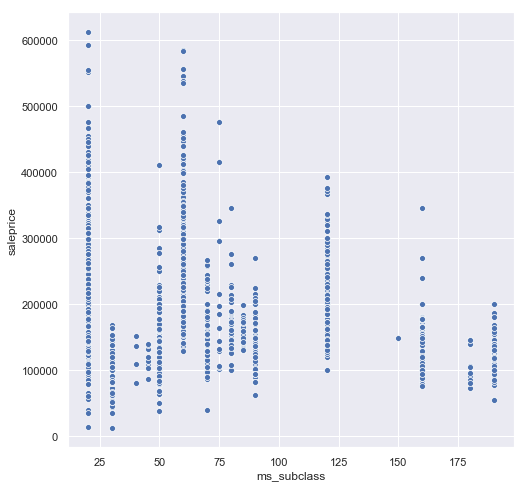

<Figure size 432x288 with 0 Axes>

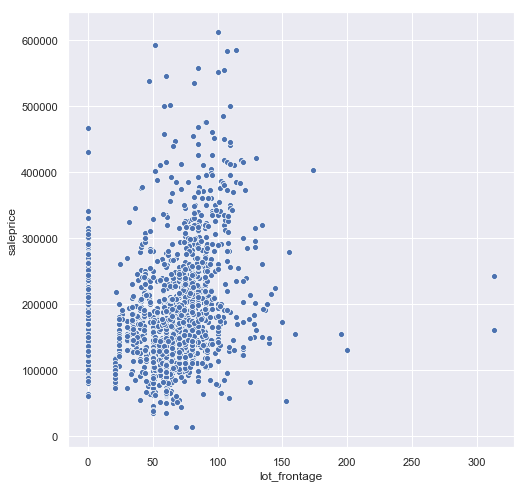

<Figure size 432x288 with 0 Axes>

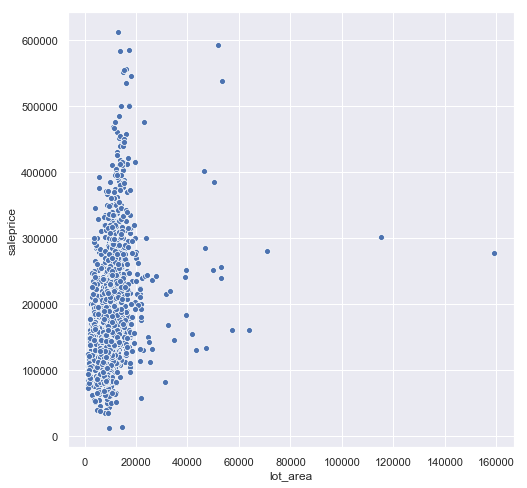

<Figure size 432x288 with 0 Axes>

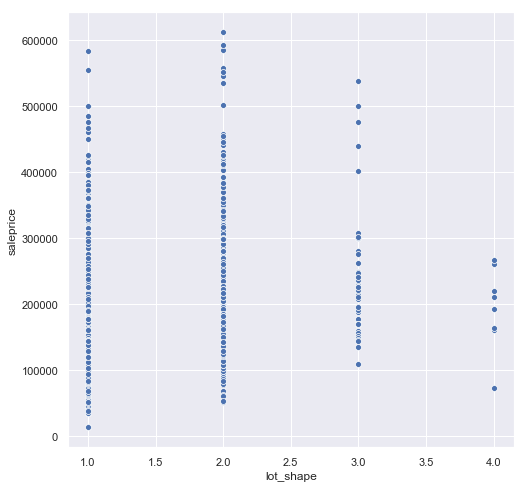

<Figure size 432x288 with 0 Axes>

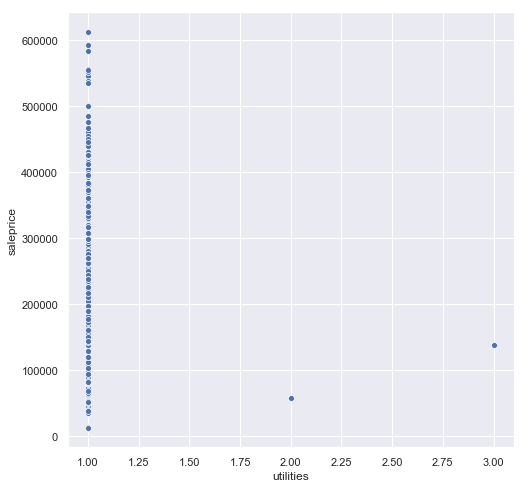

<Figure size 432x288 with 0 Axes>

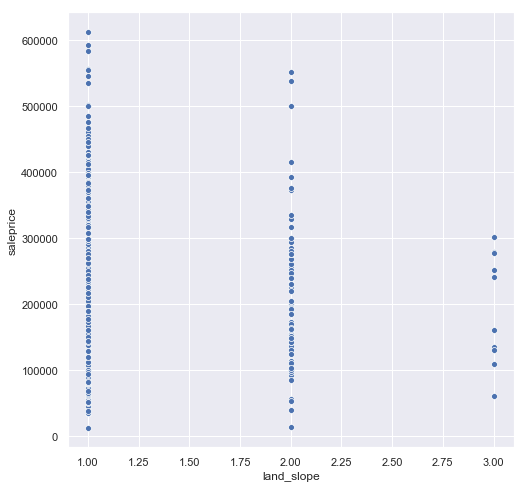

<Figure size 432x288 with 0 Axes>

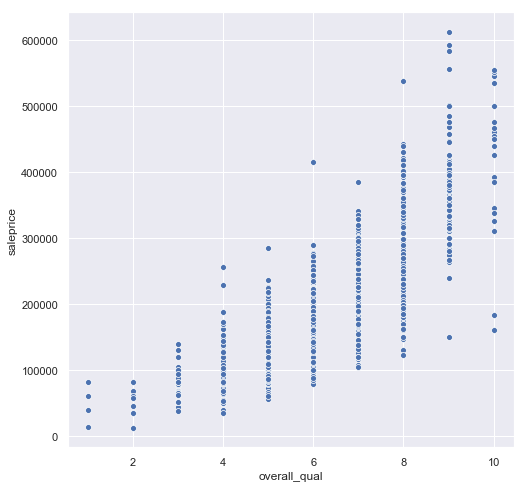

<Figure size 432x288 with 0 Axes>

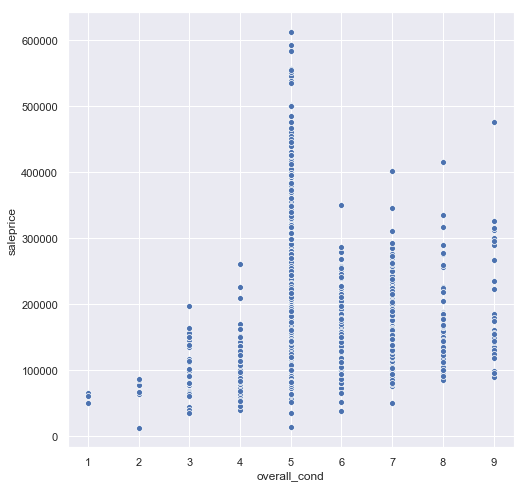

<Figure size 432x288 with 0 Axes>

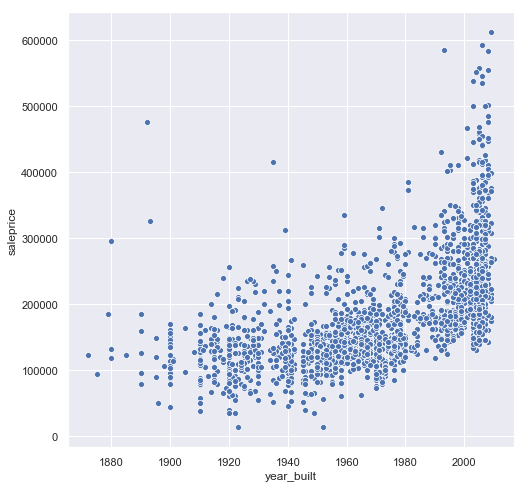

<Figure size 432x288 with 0 Axes>

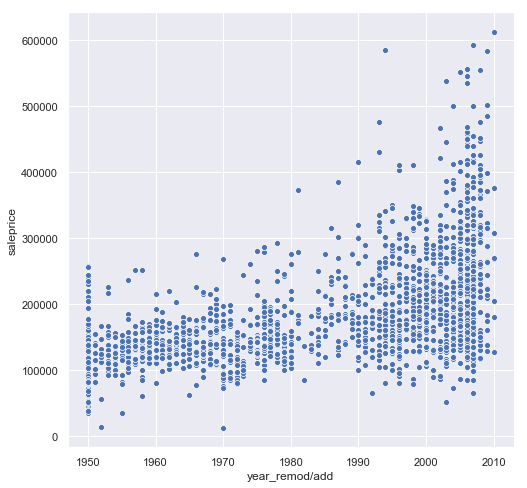

<Figure size 432x288 with 0 Axes>

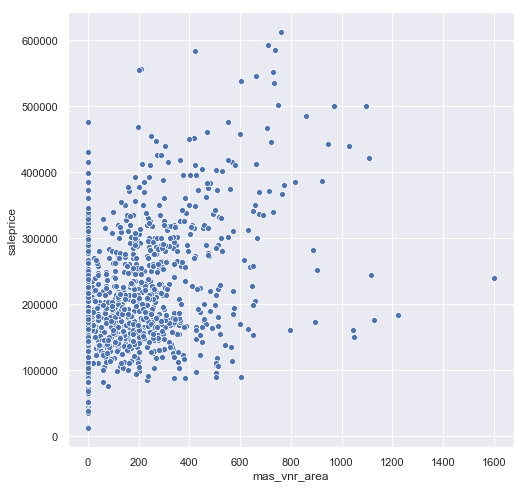

<Figure size 432x288 with 0 Axes>

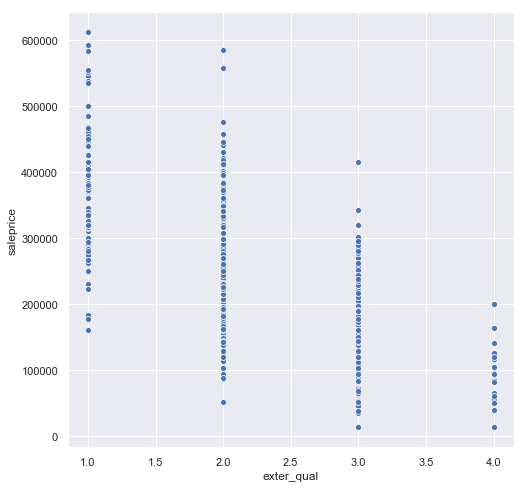

<Figure size 432x288 with 0 Axes>

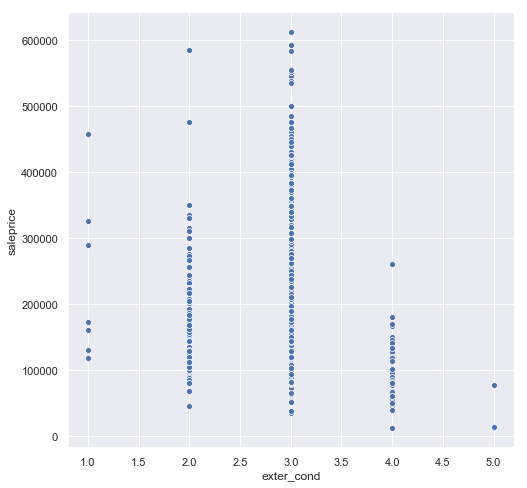

<Figure size 432x288 with 0 Axes>

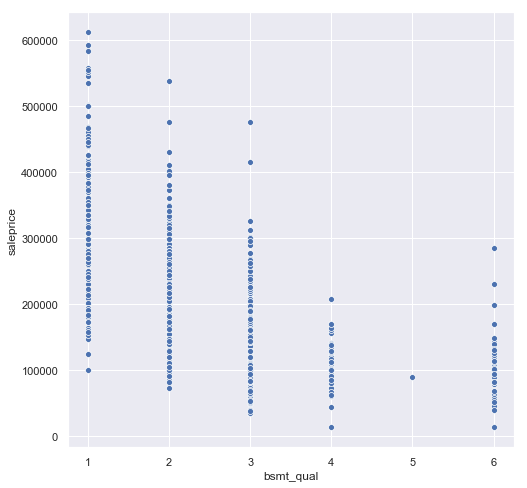

<Figure size 432x288 with 0 Axes>

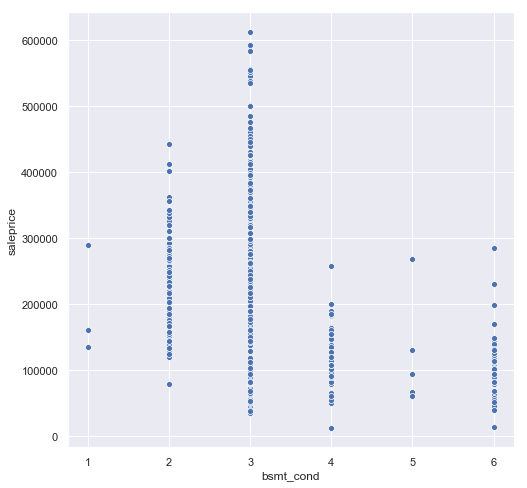

<Figure size 432x288 with 0 Axes>

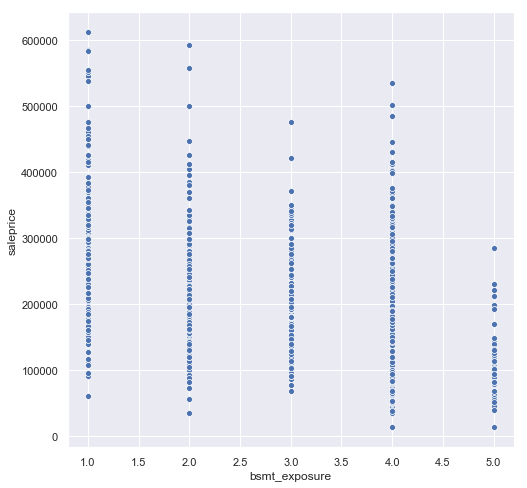

<Figure size 432x288 with 0 Axes>

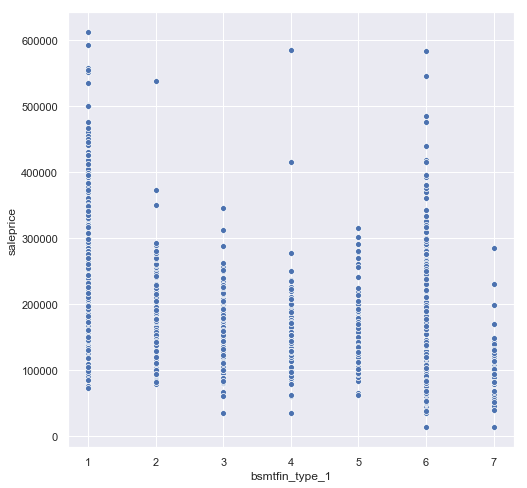

<Figure size 432x288 with 0 Axes>

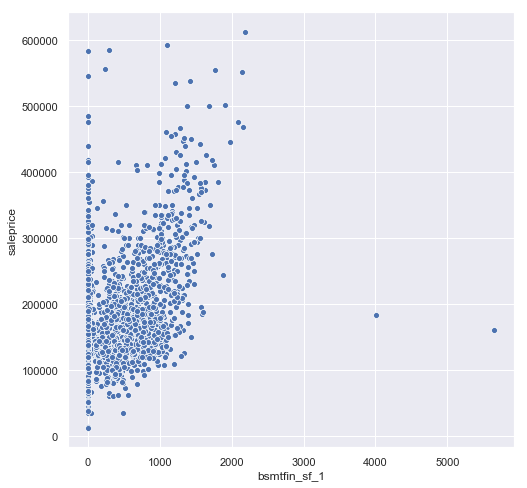

<Figure size 432x288 with 0 Axes>

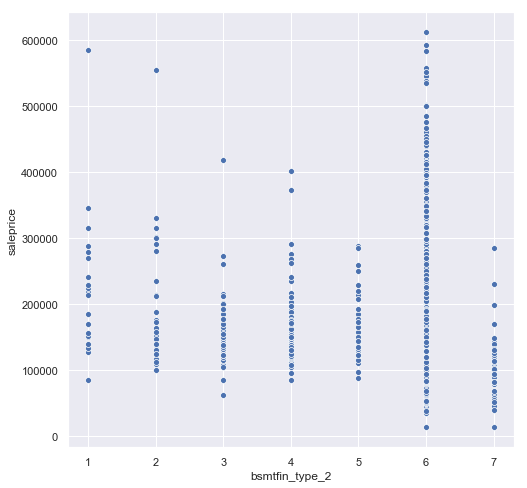

<Figure size 432x288 with 0 Axes>

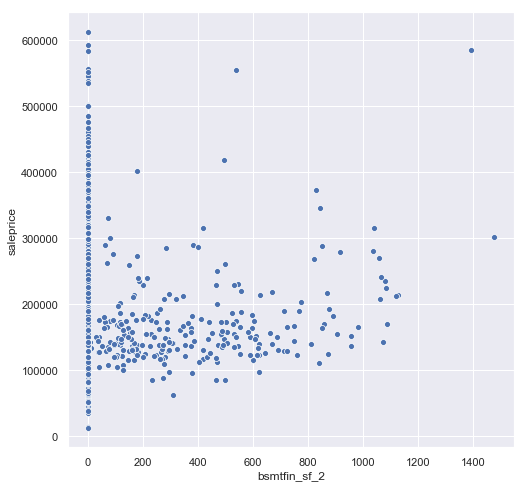

<Figure size 432x288 with 0 Axes>

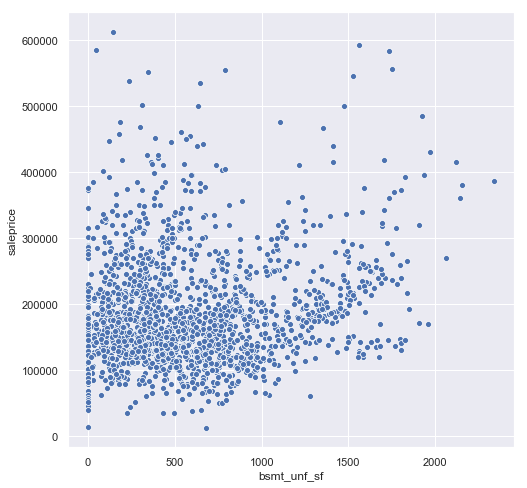

<Figure size 432x288 with 0 Axes>

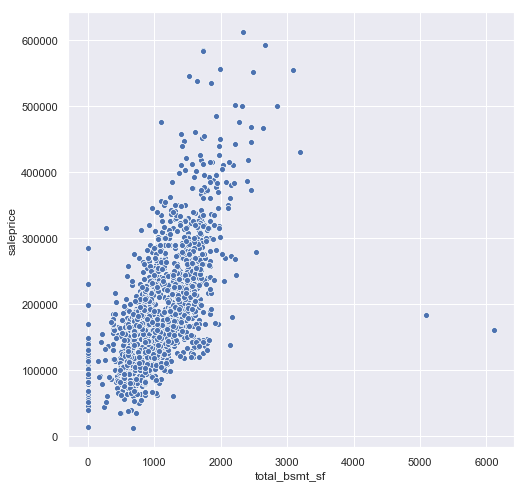

<Figure size 432x288 with 0 Axes>

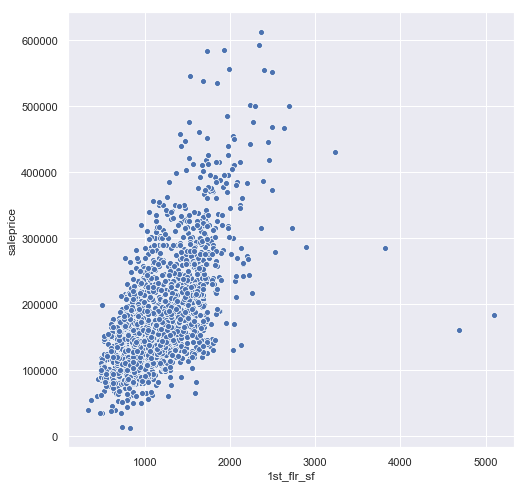

<Figure size 432x288 with 0 Axes>

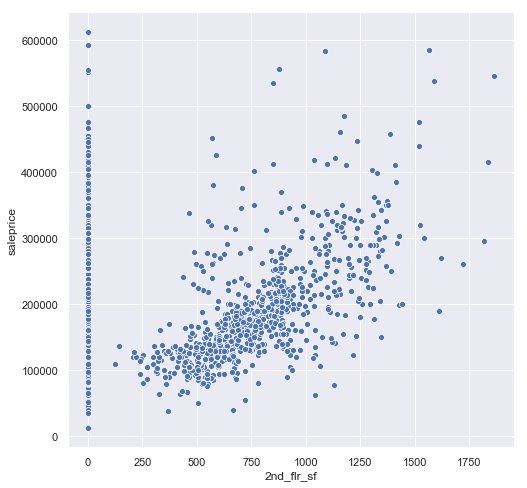

<Figure size 432x288 with 0 Axes>

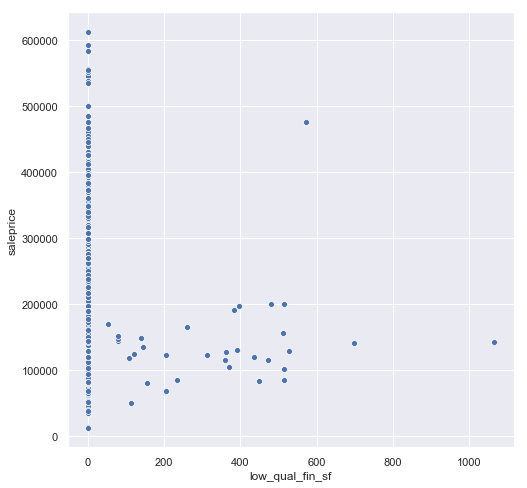

<Figure size 432x288 with 0 Axes>

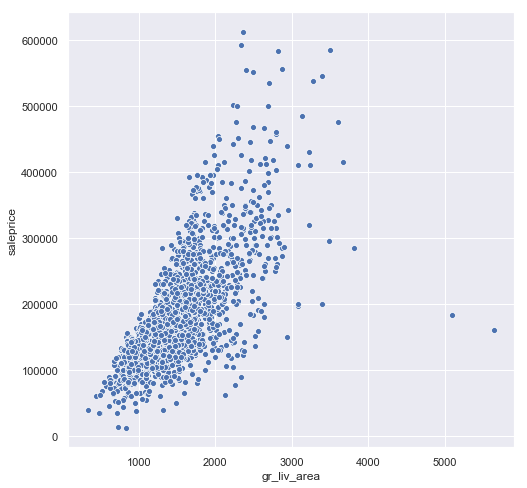

<Figure size 432x288 with 0 Axes>

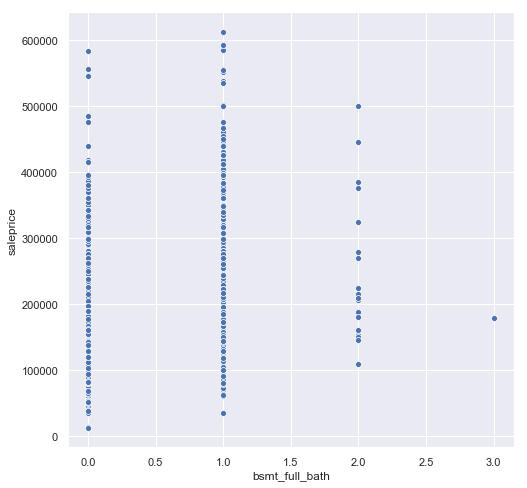

<Figure size 432x288 with 0 Axes>

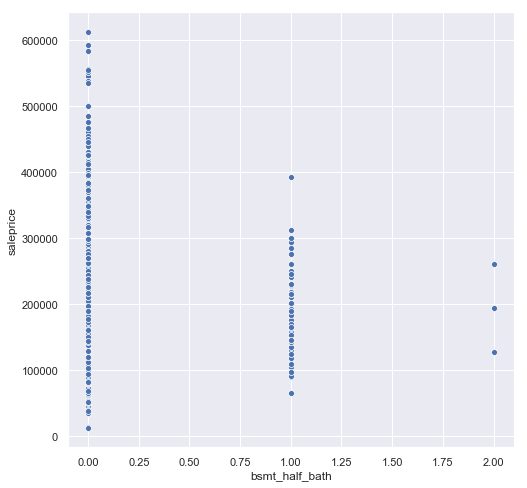

<Figure size 432x288 with 0 Axes>

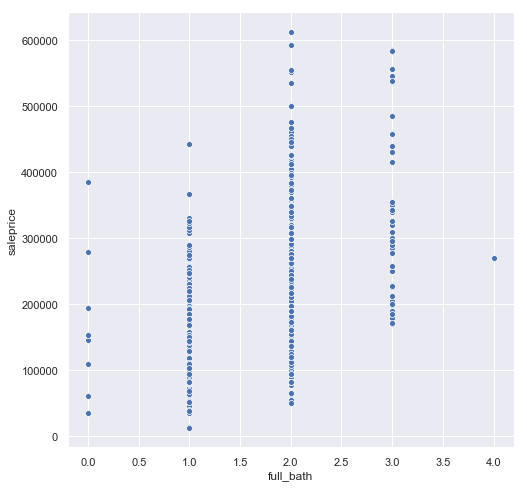

<Figure size 432x288 with 0 Axes>

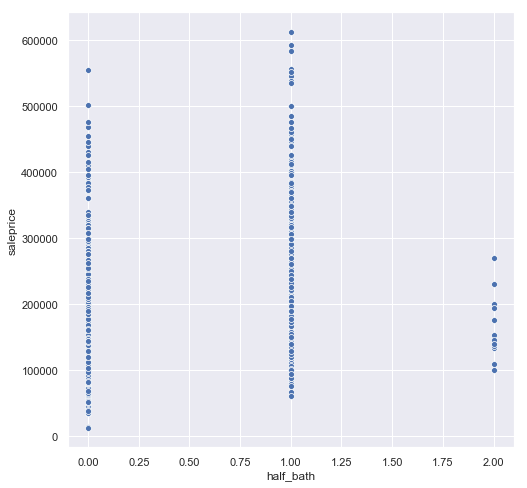

<Figure size 432x288 with 0 Axes>

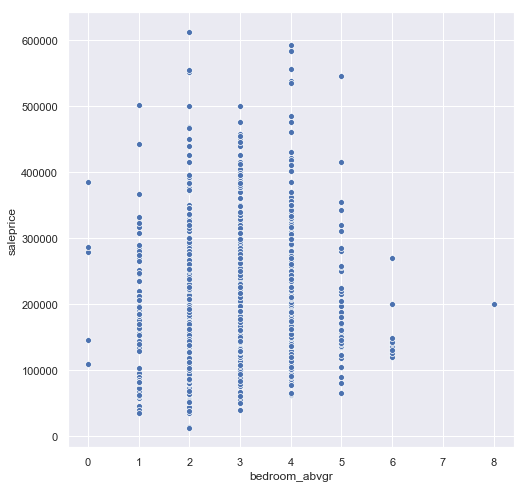

<Figure size 432x288 with 0 Axes>

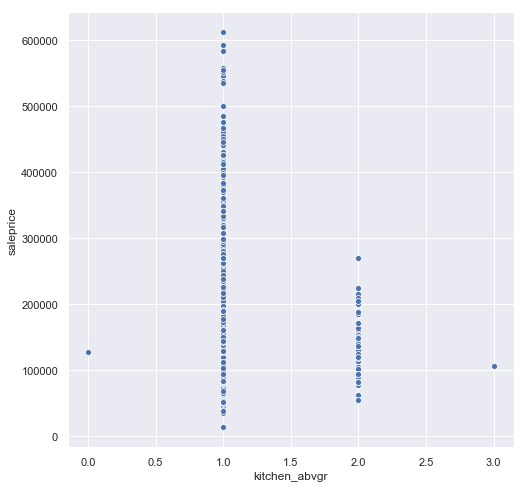

<Figure size 432x288 with 0 Axes>

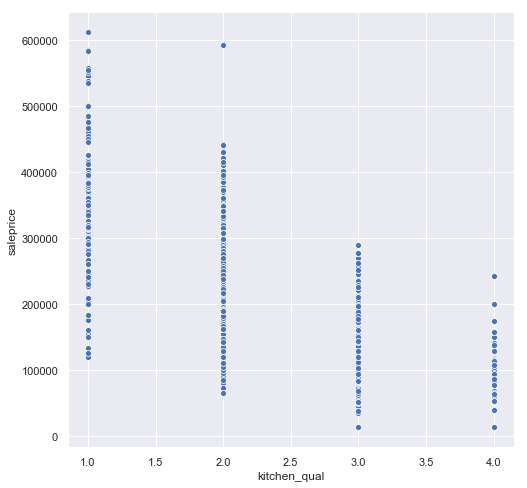

<Figure size 432x288 with 0 Axes>

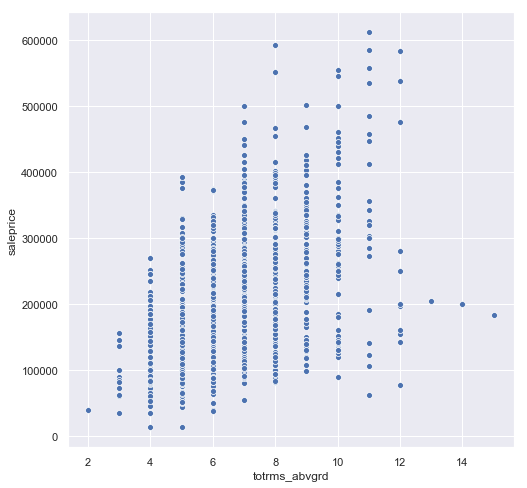

<Figure size 432x288 with 0 Axes>

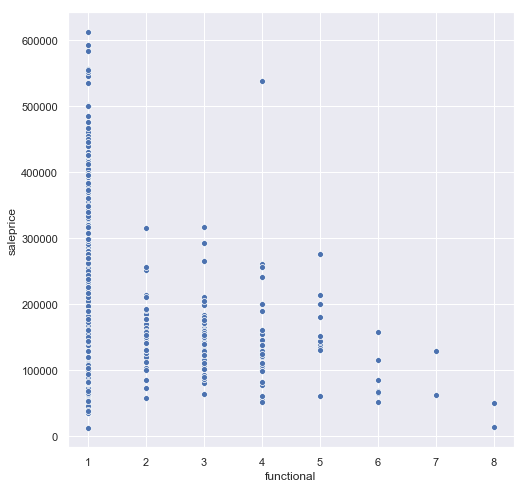

<Figure size 432x288 with 0 Axes>

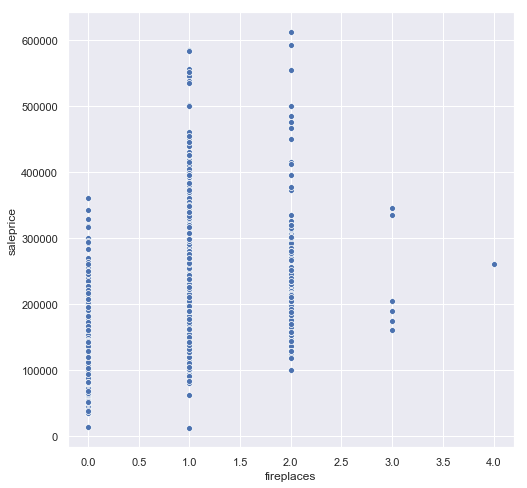

<Figure size 432x288 with 0 Axes>

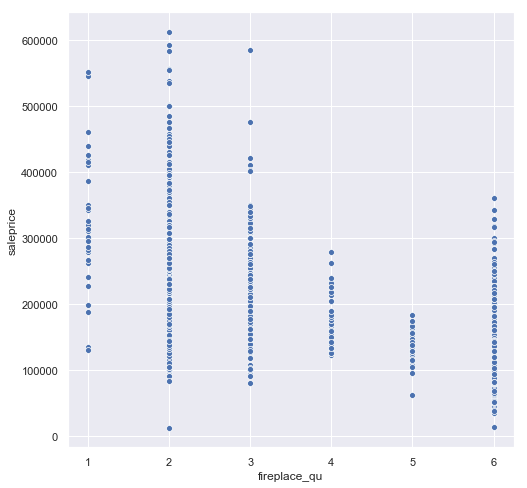

<Figure size 432x288 with 0 Axes>

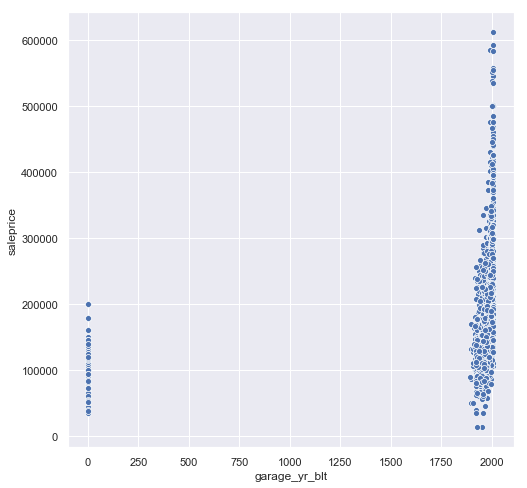

<Figure size 432x288 with 0 Axes>

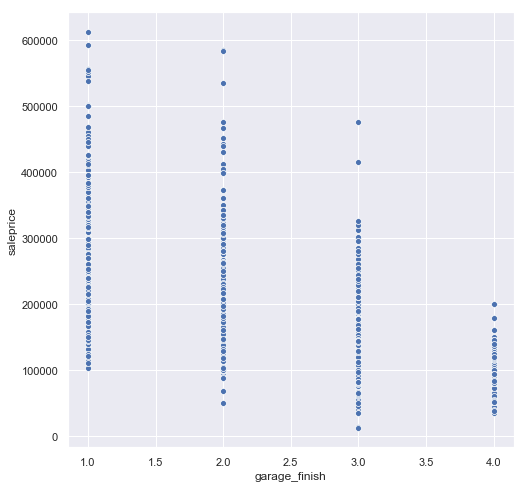

<Figure size 432x288 with 0 Axes>

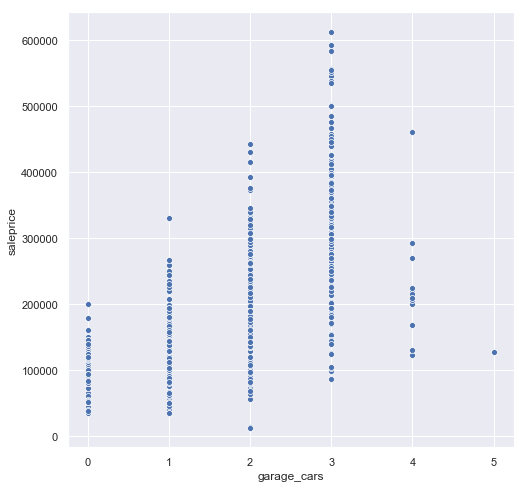

<Figure size 432x288 with 0 Axes>

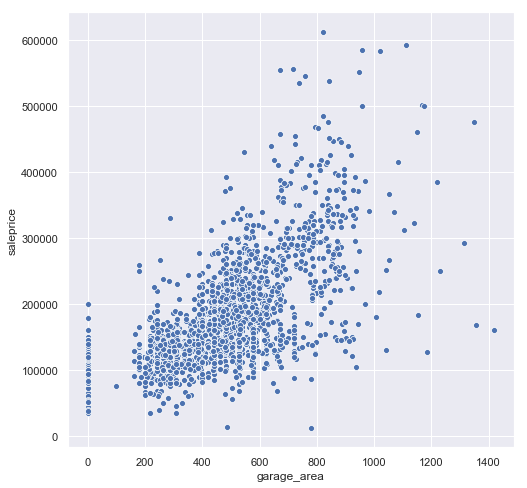

<Figure size 432x288 with 0 Axes>

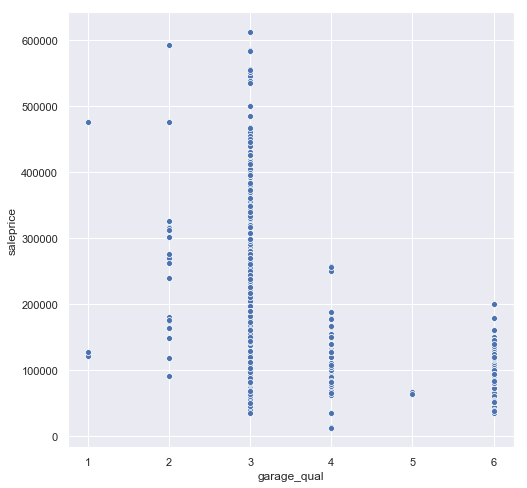

<Figure size 432x288 with 0 Axes>

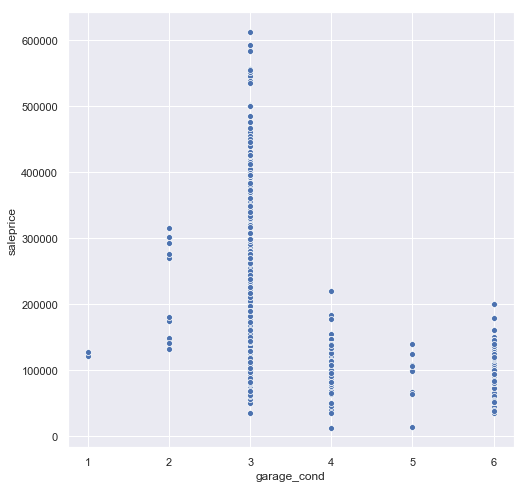

<Figure size 432x288 with 0 Axes>

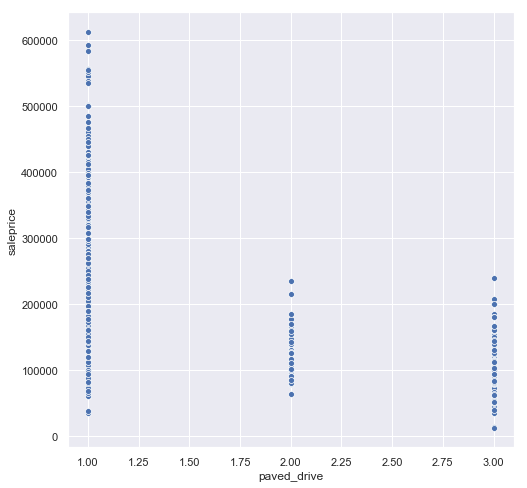

<Figure size 432x288 with 0 Axes>

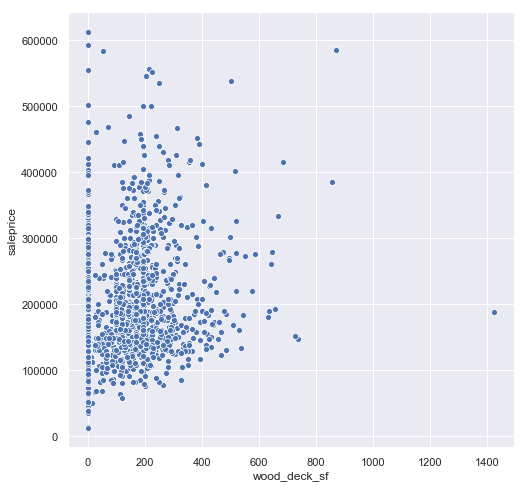

<Figure size 432x288 with 0 Axes>

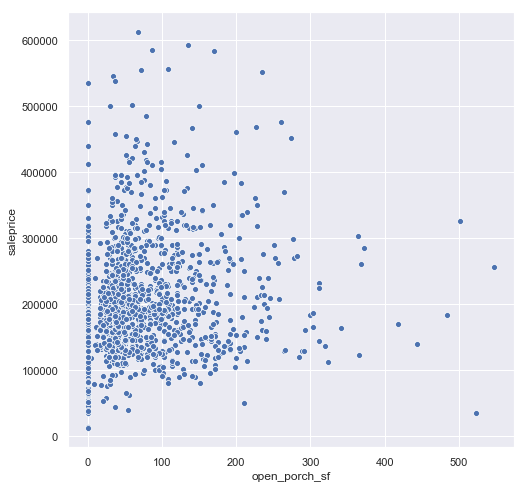

<Figure size 432x288 with 0 Axes>

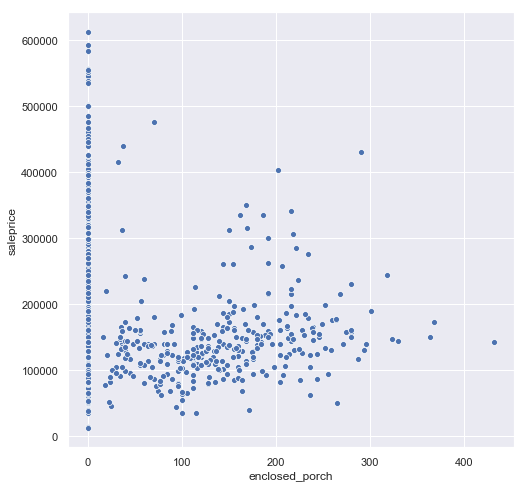

<Figure size 432x288 with 0 Axes>

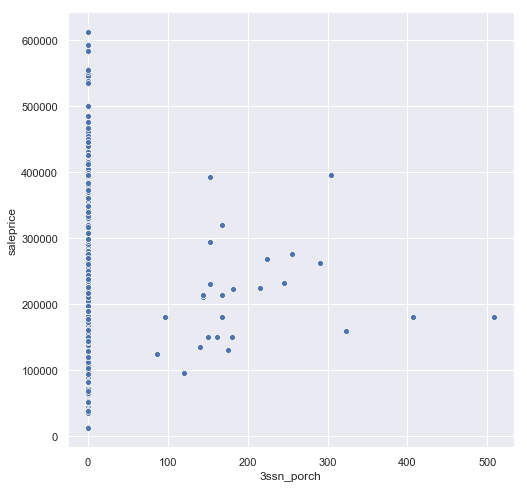

<Figure size 432x288 with 0 Axes>

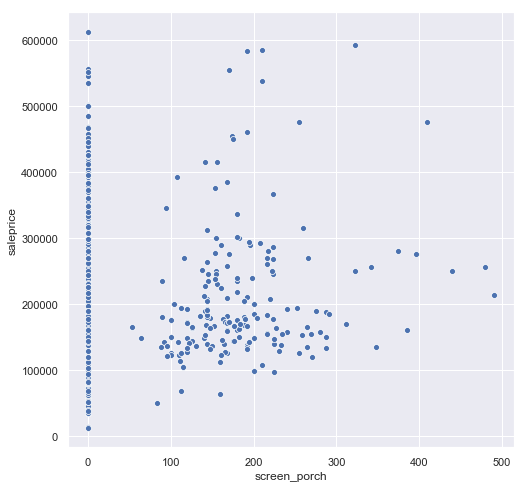

<Figure size 432x288 with 0 Axes>

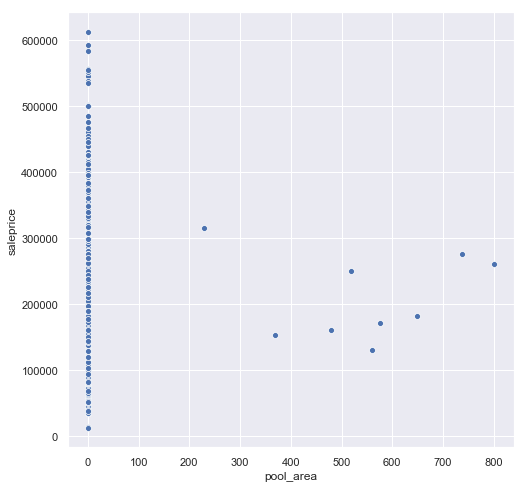

<Figure size 432x288 with 0 Axes>

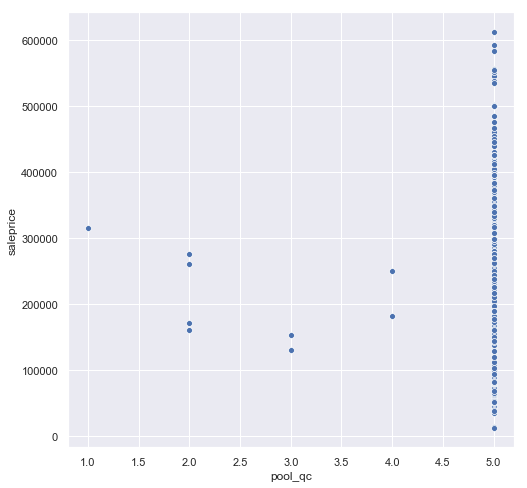

<Figure size 432x288 with 0 Axes>

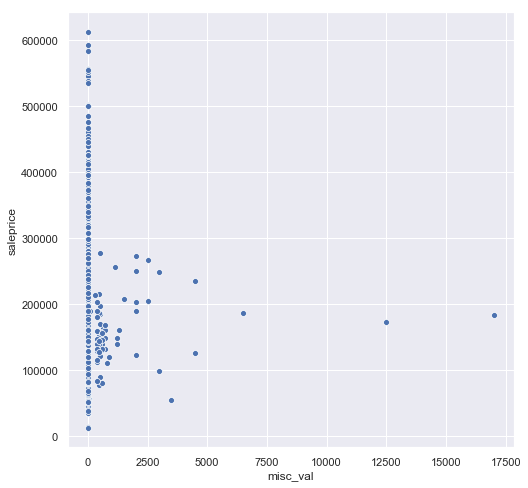

<Figure size 432x288 with 0 Axes>

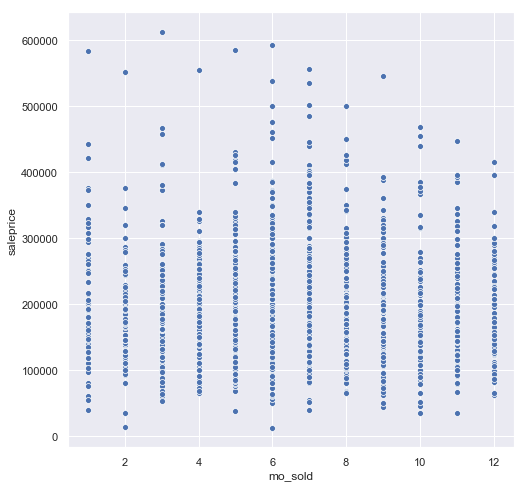

<Figure size 432x288 with 0 Axes>

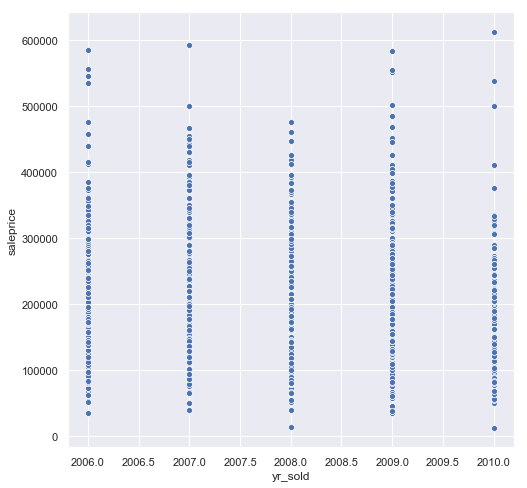

In [42]:
# Plotting scatter plots for our dataset to check for any outliers and possibly remove them.
df_train_scatter = df_train.loc[:, df_train.columns != 'saleprice']
df_train_scatter = df_train_scatter.loc[:,df_train_scatter.columns != 'id']
df_train_scatter = df_train_scatter.loc[:,df_train_scatter.columns != 'pid']


for column in df_train_scatter.columns:
    if (df_train_scatter.dtypes[column] == 'int64') | (df_train_scatter.dtypes[column] == 'float64'):
        plt.figure()
        sns.set()
        plt.subplots(figsize=(8,8))
        sns.scatterplot(x=df_train_scatter[column], y=df_train.saleprice)
        plt.xlabel(column)
        plt.ylabel('saleprice')
        

In [43]:
# Removing outliers from our data
df_train = df_train[df_train['lot_frontage'] <= 200]
df_train = df_train[df_train['lot_area'] <= 80000]
df_train = df_train[df_train['utilities'] < 2]
df_train = df_train[df_train['mas_vnr_area'] < 1400]
df_train = df_train[df_train['bsmtfin_sf_1'] <= 3000]
df_train = df_train[df_train['bsmtfin_sf_2'] <= 1200]
df_train = df_train[df_train['total_bsmt_sf'] <= 4000]
df_train = df_train[df_train['1st_flr_sf'] <= 3500]
df_train = df_train[df_train['low_qual_fin_sf'] <= 570]
df_train = df_train[df_train['gr_liv_area'] <= 4000]
df_train = df_train[df_train['bsmt_full_bath'] < 3]
df_train = df_train[df_train['bsmt_half_bath'] < 2]
df_train = df_train[df_train['full_bath'] < 4]
df_train = df_train[df_train['bedroom_abvgr'] <= 6]
df_train = df_train[(df_train['kitchen_abvgr'] > 0) | (df_train['kitchen_abvgr'] < 3)]
df_train = df_train[(df_train['kitchen_qual'] == 1) | (df_train['saleprice'] <= 500000)]
df_train = df_train[df_train['totrms_abvgrd'] < 13]
df_train = df_train[(df_train['functional'] == 1) | (df_train['saleprice'] <= 400000)]
df_train = df_train[df_train['fireplaces'] <= 3]
df_train = df_train[(df_train['garage_cars'] <= 3) | (df_train['saleprice'] <= 400000)]
df_train = df_train[df_train['garage_qual'] > 1]
df_train = df_train[df_train['garage_cond'] > 1]
df_train = df_train[df_train['wood_deck_sf'] <= 800]
df_train = df_train[df_train['open_porch_sf'] < 500]
df_train = df_train[df_train['enclosed_porch'] <= 400]
df_train = df_train[df_train['3ssn_porch'] <= 400]
df_train = df_train[(df_train['screen_porch'] < 300) | (df_train['saleprice'] <= 400000)]
df_train = df_train[df_train['misc_val'] <= 7500]

In [44]:
df_train.shape

(1982, 81)

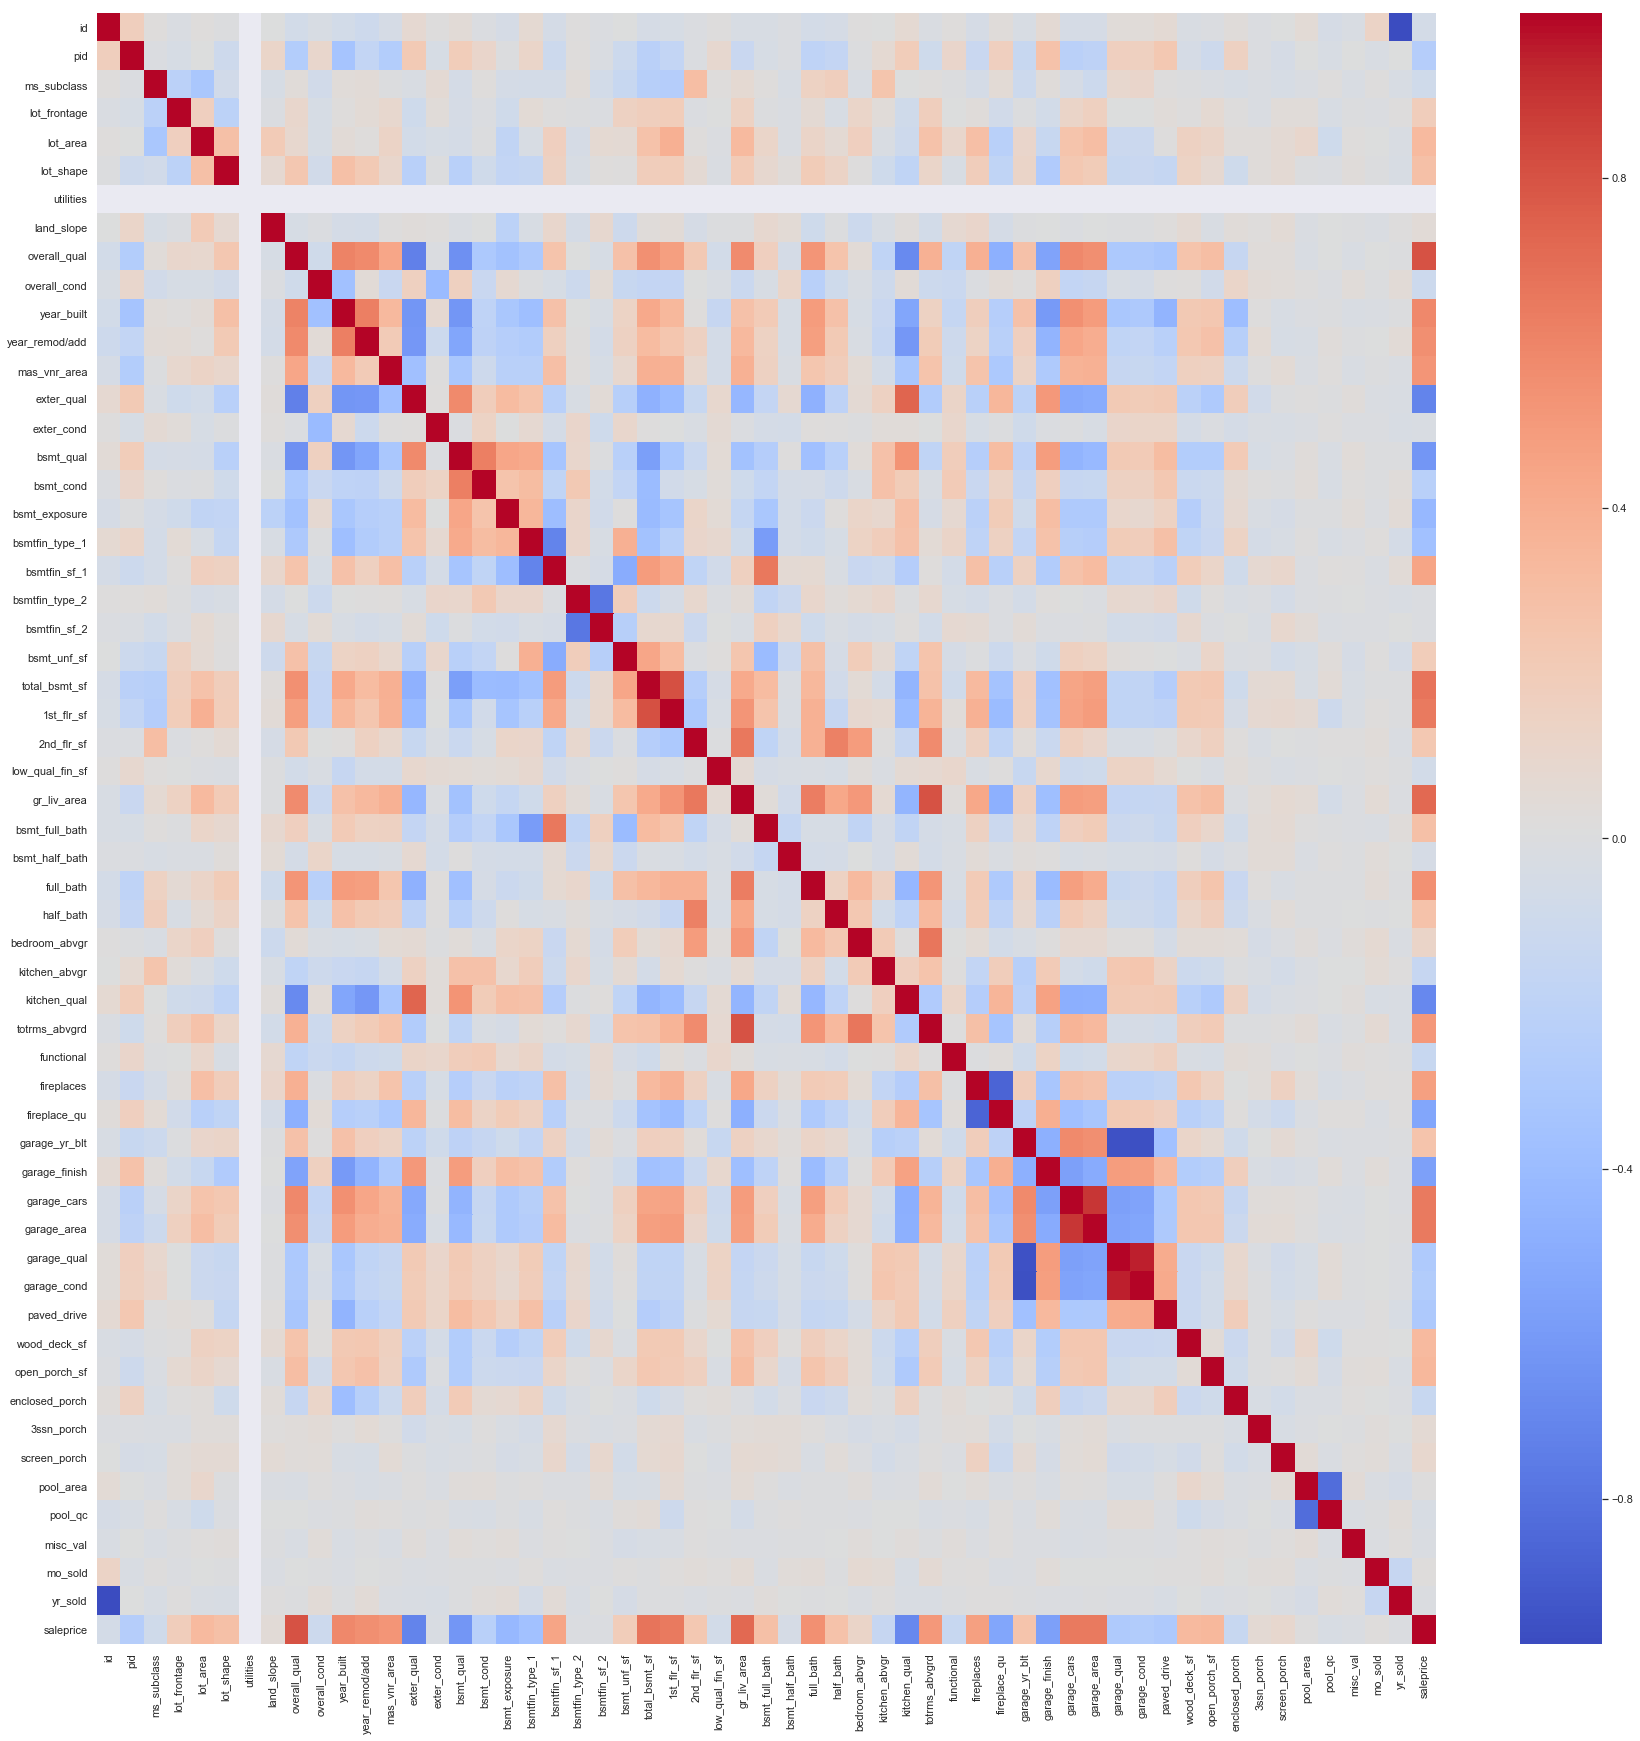

In [45]:
# taking a look at the correlation between our variables and the target with more than a correlation of 0.5
plt.subplots(figsize=(30,30))
sns.heatmap(df_train.corr(), cmap='coolwarm');

In [46]:
# Correlation between saleprice and variables
df_train.corr()['saleprice'].sort_values(ascending=True)

exter_qual        -0.717624
kitchen_qual      -0.697934
bsmt_qual         -0.623095
garage_finish     -0.569347
fireplace_qu      -0.539830
bsmt_exposure     -0.422098
bsmtfin_type_1    -0.360893
paved_drive       -0.293190
garage_qual       -0.285817
garage_cond       -0.273532
pid               -0.254628
bsmt_cond         -0.230497
kitchen_abvgr     -0.143316
functional        -0.142064
enclosed_porch    -0.135244
overall_cond      -0.104510
ms_subclass       -0.087603
low_qual_fin_sf   -0.071578
id                -0.061485
bsmt_half_bath    -0.045268
pool_qc           -0.031741
exter_cond        -0.025178
misc_val          -0.015199
bsmtfin_sf_2      -0.006750
bsmtfin_type_2    -0.006503
yr_sold           -0.004213
pool_area          0.019530
mo_sold            0.024302
land_slope         0.045128
3ssn_porch         0.064707
screen_porch       0.096346
bedroom_abvgr      0.126270
lot_frontage       0.186900
bsmt_unf_sf        0.195019
2nd_flr_sf         0.234978
garage_yr_blt      0

Notes:
- There are quite a few features that have a strong positive correlation with the saleprice.
- Will take into account features with correlation of 0.3 or more and work with them further.

In [47]:
# checking the count of types for the columns
df_train.dtypes.value_counts()

int64      46
object     24
float64    11
dtype: int64

## Splitting and Scaling of Data

In [48]:
X_train = df_train.select_dtypes(exclude='object')
X_train = X_train.drop(['id', 'pid', 'saleprice','garage_yr_blt', 'ms_subclass'], axis=1)
# removing garage_yr_blt as there are some houses with no garages, which I have indicated the year as 0.
# this will heavily skew our data.
# removing ms_subclass as it is a categorical nominal variable and might not be appropriate for our feature
# selection methods

y_train = df_train['saleprice']

In [49]:
X_train.columns

Index(['lot_frontage', 'lot_area', 'lot_shape', 'utilities', 'land_slope',
       'overall_qual', 'overall_cond', 'year_built', 'year_remod/add',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond',
       'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2',
       'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_finish', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond', 'paved_drive',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'pool_qc', 'misc_val', 'mo_sold',
       'yr_sold'],
      dtype='object')

In [50]:
# Train/test split
X_train, X_validation, y_train, y_validation = train_test_split(X_train,
                                                                y_train,
                                                                test_size=0.2,
                                                                random_state=42
                                                                )

In [51]:
# Scaling our training set of our training data.
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_validation_ss = ss.transform(X_validation)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Modelling

In [52]:
# Creating an instance of a linear model
lm = LinearRegression()

In [53]:
# Using RFE to cut down the number of features by half.
rfe = RFE(lm)
rfe = rfe.fit(X_train_ss, y_train)

rfe.ranking_

array([ 1,  1, 13, 11,  6,  1,  1,  1, 21,  1,  1, 19,  1,  1,  1,  2,  1,
       20,  1,  1,  1,  1,  1,  1,  1,  7, 24,  8, 12,  1,  1,  1,  1,  1,
       27,  1, 26,  9,  1,  1, 10, 25, 23, 14, 15, 16,  5,  4,  3, 18, 22,
       17])

In [54]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [55]:
# assigning our selected features from the RFE feature selection
X_train_ss = X_train_ss[:,rfe.support_]
X_validation_ss = X_validation_ss[:,rfe.support_]

In [56]:
# Performing cross-validation
cv_scores = cross_val_score(lm, X_train_ss, y_train, cv=5)
print('Scores:', cv_scores)
print('Mean Score:', cv_scores.mean())

Scores: [0.89548008 0.89717998 0.89278041 0.84559623 0.89631009]
Mean Score: 0.8854693572542633


In [57]:
# fitting model with our training data
lm.fit(X_train_ss, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# R2 of our baseline model
lm.score(X_train_ss, y_train)

0.8920096449501271

In [59]:
# R2 of baseline model with validation data
lm.score(X_validation_ss, y_validation)

0.9041142487700113

In [60]:
# coefficients of our model
lm.coef_

array([ 3294.58942864,  5799.11711973, 13362.06429859,  5519.75685563,
        7345.46106859,  4881.77960147, -8712.16821794, -5168.50278936,
        6135.1047004 , -3434.38211273,  8825.31645374,  1226.7135586 ,
        -783.43408685,  8923.98404835,  8120.36977492,  8240.53313394,
        -552.4896923 , 13824.17641691, -4675.19476549, -4031.95798869,
       -6400.20125211,  4249.45804726, -4381.73324779, -3273.7478705 ,
        5810.37334073,  3034.2772884 ])

<Figure size 432x288 with 0 Axes>

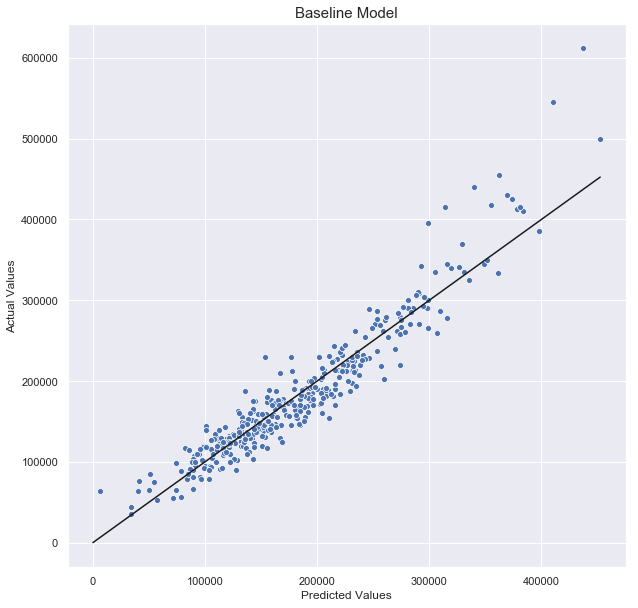

In [61]:
# predictions with our validation data
yhat_validation = lm.predict(X_validation_ss)

# plotting yhat_validation against the actual y from our validation data
plt.figure()
sns.set()
plt.subplots(figsize=(10,10))
sns.scatterplot(x=yhat_validation, y=y_validation)
plt.plot([0, np.max(yhat_validation)], [0, np.max(yhat_validation)], c = 'k')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Baseline Model', fontsize=15);

In [62]:
# R2 our model with the validation data
lm.score(X_validation_ss, y_validation)

0.9041142487700113

In [63]:
print('R2 Score:',r2_score(y_validation, yhat_validation))
print('MSE:', mean_squared_error(y_validation, yhat_validation))
print('RMSE:', np.sqrt(mean_squared_error(y_validation, yhat_validation)))

R2 Score: 0.9041142487700113
MSE: 633449826.6163032
RMSE: 25168.42916465593


## Feature Engineering

In [64]:
# Checking VIF for each feature used in our model
vif = pd.DataFrame()
vif["vif_factor"] = [variance_inflation_factor(X_train_ss, i) for i in range(X_train_ss.shape[1])]
vif["features"] = X_train.columns[rfe.support_]

vif

/Users/Jerome/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


vif_factor         features
0     1.106865     lot_frontage
1     1.372193         lot_area
2     4.067633     overall_qual
3     1.389047     overall_cond
4     2.783796       year_built
5     1.377995     mas_vnr_area
6     3.179906       exter_qual
7     4.380504        bsmt_qual
8     2.414288        bsmt_cond
9     1.433676    bsmt_exposure
10         inf     bsmtfin_sf_1
11         inf     bsmtfin_sf_2
12         inf      bsmt_unf_sf
13         inf    total_bsmt_sf
14         inf       1st_flr_sf
15         inf       2nd_flr_sf
16         inf  low_qual_fin_sf
17         inf      gr_liv_area
18    2.367618    bedroom_abvgr
19    1.539647    kitchen_abvgr
20    2.545936     kitchen_qual
21    4.466094    totrms_abvgrd
22    1.159713       functional
23    1.595506     fireplace_qu
24    2.540142      garage_area
25    1.767015      garage_qual

Observation:
- Several features have high VIF(>=5), in other words, there is some strong correlation between them.
- Some of the features with high VIF factor will be removed as they may impact our model's accuracy

In [65]:
# Features to remove
remove_features_vif = ['bsmtfin_sf_1',
                       'bsmtfin_sf_2',
                       'bsmt_unf_sf',
                       '1st_flr_sf',
                       '2nd_flr_sf',
                       'low_qual_fin_sf'
                      ] 

features_vif = ~vif['features'].isin(remove_features_vif) # remaining features we will be working with

In [66]:
vif_features_list = [k for k in vif['features'] if k not in remove_features_vif]

vif_features_list

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'total_bsmt_sf',
 'gr_liv_area',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplace_qu',
 'garage_area',
 'garage_qual']

In [67]:
# Removing features from VIF results
X_train_ss_2 = X_train_ss[:,features_vif]

In [68]:
# Removing features from VIF results
X_validation_ss_2 = X_validation_ss[:,features_vif]

In [69]:
# stats of our model
X_train_ss_2 = sm.add_constant(X_train_ss_2)
OLS_model = sm.OLS(y_train, X_train_ss_2)
OLS_model = OLS_model.fit()

OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     581.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        05:37:18   Log-Likelihood:                -18373.
No. Observations:                1585   AIC:                         3.679e+04
Df Residuals:                    1564   BIC:                         3.690e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.794e+05    662.066    270.921      0.000    1.78e+05    1.81e+05
x1          2668.6918    693.950      3.846      0.000    1307.522    4029.862
x2          6076.7575    766.168      7.931      0.000    4573.934    7579.581
x3          1.171e+04   1323.443      8.852      0.000    9118.785    1.43e+04
x4          6541.2026    773.029      8.462      0.000    5024.920    8057.485
x5          8513.3283   1096.399      7.765      0.000    6362.762    1.07e+04
x6          6073.7216    769.789      7.890      0.000    4563.794    7583.649
x7         -7405.0275   1169.732     -6.331      0.000   -9699.436   -5110.619
x8         -5546.9749   1345.776     -4.122      0.000   -8186.691   -2907.259
x9          6912.1900    999.623      6.915      0.000    4951.448    8872.932
x10        -5426.9703    771.743     -7.032      0.000   -6940.730   -3913.210
x11         1.299e+04    968.683     13.408      0.000    1.11e+04    1.49e+04
x12         2.435e+04   1440.860     16.901      0.000    2.15e+04    2.72e+04
x13        -5579.0356    996.930     -5.596      0.000   -7534.496   -3623.575
x14        -3811.0659    809.072     -4.710      0.000   -5398.046   -2224.086
x15        -6934.9754   1053.570     -6.582      0.000   -9001.535   -4868.416
x16         2773.2044   1388.529      1.997      0.046      49.631    5496.778
x17        -4427.3143    710.003     -6.236      0.000   -5819.973   -3034.656
x18        -3830.5760    830.392     -4.613      0.000   -5459.375   -2201.777
x19         6275.8938   1051.656      5.968      0.000    4213.089    8338.699
x20         2225.3946    871.398      2.554      0.011     516.163    3934.626
==============================================================================
Omnibus:                      269.372   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2917.778
Skew:                           0.441   Prob(JB):                         0.00
Kurtosis:                       9.588   Cond. No.                         6.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:
- All features have p-values <0.05 which indicates that these features they are statistically significant

In [70]:
# removing intercept column
X_train_ss_2 = np.delete(X_train_ss_2, 0, axis=1)


In [71]:
df_train.select_dtypes(include='object').head()

ms_zoning street alley land_contour lot_config neighborhood condition_1  \
0        RL   Pave    NA          Lvl    CulDSac       Sawyer        RRAe   
1        RL   Pave    NA          Lvl    CulDSac      SawyerW        Norm   
2        RL   Pave    NA          Lvl     Inside        NAmes        Norm   
3        RL   Pave    NA          Lvl     Inside       Timber        Norm   
4        RL   Pave    NA          Lvl     Inside      SawyerW        Norm   

  condition_2 bldg_type house_style roof_style roof_matl exterior_1st  \
0        Norm      1Fam      2Story      Gable   CompShg      HdBoard   
1        Norm      1Fam      2Story      Gable   CompShg      VinylSd   
2        Norm      1Fam      1Story      Gable   CompShg      VinylSd   
3        Norm      1Fam      2Story      Gable   CompShg      VinylSd   
4        Norm      1Fam      1.5Fin      Gable   CompShg      Wd Sdng   

  exterior_2nd mas_vnr_type foundation heating heating_qc central_air  \
0      Plywood      BrkFace     CBlock    GasA         Ex           Y   
1      VinylSd      BrkFace      PConc    GasA         Ex           Y   
2      VinylSd         None     CBlock    GasA         TA           Y   
3      VinylSd         None      PConc    GasA         Gd           Y   
4      Plywood         None      PConc    GasA         TA           Y   

  electrical garage_type fence misc_feature sale_type  
0      SBrkr      Attchd    NA           NA       WD   
1      SBrkr      Attchd    NA           NA       WD   
2      SBrkr      Detchd    NA           NA       WD   
3      SBrkr     BuiltIn    NA           NA       WD   
4      SBrkr      Detchd    NA           NA       WD

In [72]:
# Converting some of the categorical features that might affect saleprice to dummy variables
neighborhood_dummy = pd.get_dummies(df_train['neighborhood'])
neighborhood_dummy.columns = ['neighborhood_' + name.replace('-','_').lower() for name in neighborhood_dummy.columns]
neighborhood_dummy = neighborhood_dummy.iloc[:,1:]
bldg_type_dummy = pd.get_dummies(df_train['bldg_type'])
bldg_type_dummy.columns = ['bldg_type_' + name.replace('-','_').lower() for name in bldg_type_dummy.columns]
bldg_type_dummy = bldg_type_dummy.iloc[:,1:]
garage_type_dummy = pd.get_dummies(df_train['garage_type'])
garage_type_dummy.columns = ['garage_type_' + name.replace('-','_').lower() for name in garage_type_dummy.columns]
garage_type_dummy = garage_type_dummy.iloc[:,1:]
misc_feature_dummy = pd.get_dummies(df_train['misc_feature'])
misc_feature_dummy.columns = ['misc_feature_' + name.replace('-','_').lower() for name in misc_feature_dummy.columns]
misc_feature_dummy = misc_feature_dummy.iloc[:,1:]
ms_subclass_dummy = pd.get_dummies(df_train['ms_subclass'])
ms_subclass_dummy.columns = ['ms_subclass_' + str(name) for name in ms_subclass_dummy.columns]
ms_subclass_dummy = ms_subclass_dummy.iloc[:,1:]


dummy_columns = [neighborhood_dummy,
                 bldg_type_dummy,
                 garage_type_dummy,
                 misc_feature_dummy,
                 ms_subclass_dummy,
                 ]

dummy_data = pd.concat(dummy_columns, axis=1)


In [73]:
# splitting and scaling our dummy data
X_train_dummy, X_validation_dummy = train_test_split(dummy_data, test_size=0.2, random_state=42)

X_train_dummy_ss = ss.fit_transform(X_train_dummy)
X_validation_dummy_ss = ss.transform(X_validation_dummy)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """


In [74]:
# joining our dummy data to the main training and validation data
X_train_ss_2 = np.concatenate((X_train_ss_2, X_train_dummy_ss), axis=1)
X_validation_ss_2 = np.concatenate((X_validation_ss_2, X_validation_dummy_ss), axis=1)

In [75]:
# fitting our model again with our selected features
lm2 = LinearRegression()
lm2.fit(X_train_ss_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
# R2 of our new model
lm2.score(X_train_ss_2, y_train)

0.9028667079116663

In [77]:
# Coefficients of our new model
lm2.coef_

array([ 9.73740935e+02,  4.72983227e+03,  1.02398948e+04,  6.47477528e+03,
        1.33755386e+04,  4.97898814e+03, -5.49923270e+03, -4.57149528e+03,
        5.45974735e+03, -6.54151592e+03,  1.01851590e+04,  2.58069852e+04,
       -5.35003477e+03, -9.99867003e+02, -6.34514500e+03,  1.53036188e+03,
       -3.97900369e+03, -2.40942969e+03,  6.29302084e+03, -2.42112091e+03,
        4.11089774e+02,  1.74535747e+03,  1.92244871e+03,  8.79491638e+02,
       -6.69678812e+02,  4.80341275e+03,  1.29392812e+03, -9.89506965e+01,
        3.63152697e+02,  3.23845420e+03,  6.55916657e+02,  8.02396825e+02,
        2.16164590e+03,  1.15068639e+03,  1.83515532e+03,  2.46883084e+03,
       -9.27094176e+02,  3.60030781e+03,  8.00029741e+03, -7.01472685e+01,
        1.24995033e+03,  1.97898224e+03, -1.03126868e+03,  2.51025008e+03,
        6.77247192e+03,  3.45330494e+02,  7.31836218e+02,  3.86140077e+03,
       -8.63543217e+16, -7.69609038e+02,  9.38188004e+02,  8.79298733e+03,
        1.80758671e+03,  

In [78]:
# R2 of our new model with validation data
lm2.score(X_validation_ss_2, y_validation)

0.9133940847497496

<Figure size 432x288 with 0 Axes>

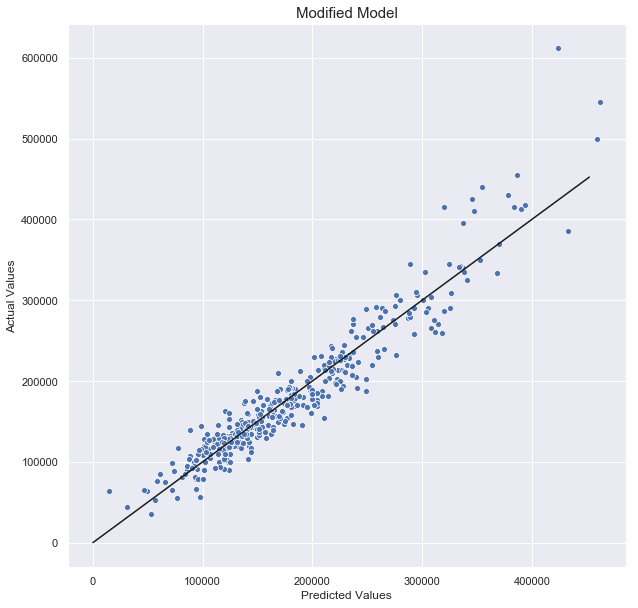

In [79]:
# predictions with our validation data
yhat_validation_2 = lm2.predict(X_validation_ss_2)

# plotting yhat_validation against the actual y from our validation data
plt.figure()
sns.set()
plt.subplots(figsize=(10,10))
sns.scatterplot(x=yhat_validation_2, y=y_validation)
plt.plot([0, np.max(yhat_validation)], [0, np.max(yhat_validation)], c = 'k')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Modified Model', fontsize=15);

In [80]:
print('R2 Score:',r2_score(y_validation, yhat_validation_2))
print('MSE:', mean_squared_error(y_validation, yhat_validation_2))
print('RMSE:', np.sqrt(mean_squared_error(y_validation, yhat_validation_2)))

R2 Score: 0.9133940847497496
MSE: 572144466.6750393
RMSE: 23919.541523094445


In [81]:
# features used
features_before_OLS = [k for k in vif[features_vif]['features']]
features_removed_from_OLS = []
      
features = [k for k in features_before_OLS if k not in features_removed_from_OLS]

features

['lot_frontage',
 'lot_area',
 'overall_qual',
 'overall_cond',
 'year_built',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'total_bsmt_sf',
 'gr_liv_area',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplace_qu',
 'garage_area',
 'garage_qual']

## Test Data

In [82]:
# Renaming columns of test data set
df_test.columns = df_test.columns.str.replace(' ','_').str.lower()

df_test.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  alley lot_shape land_contour utilities lot_config land_slope neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [83]:
# Checking for null values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
id                 879 non-null int64
pid                879 non-null int64
ms_subclass        879 non-null int64
ms_zoning          879 non-null object
lot_frontage       719 non-null float64
lot_area           879 non-null int64
street             879 non-null object
alley              58 non-null object
lot_shape          879 non-null object
land_contour       879 non-null object
utilities          879 non-null object
lot_config         879 non-null object
land_slope         879 non-null object
neighborhood       879 non-null object
condition_1        879 non-null object
condition_2        879 non-null object
bldg_type          879 non-null object
house_style        879 non-null object
overall_qual       879 non-null int64
overall_cond       879 non-null int64
year_built         879 non-null int64
year_remod/add     879 non-null int64
roof_style         879 non-null object
roof_m

In [84]:
# Replacing null values
# filling up all missing values
df_test.lot_frontage.fillna(0, inplace=True)
df_test.alley.fillna('NA', inplace=True)
df_test.mas_vnr_type.fillna('None', inplace=True)
df_test.mas_vnr_area.fillna(0, inplace=True)
df_test.bsmt_qual.fillna('NA', inplace=True)
df_test.bsmt_cond.fillna('NA', inplace=True)
df_test.loc[no_bsmt_exposure_index,'bsmt_exposure'].fillna('No', inplace=True)
df_test.bsmt_exposure.fillna('NA', inplace=True)
df_test.bsmtfin_type_1.fillna('NA', inplace=True)
df_test.bsmtfin_sf_1.fillna(0, inplace=True)
df_test.bsmtfin_type_2.fillna('NA', inplace=True)
df_test.bsmtfin_sf_2.fillna(0, inplace=True)
df_test.bsmt_unf_sf.fillna(0, inplace=True)
df_test.total_bsmt_sf.fillna(0, inplace=True)
df_test.bsmt_full_bath.fillna(0, inplace=True)
df_test.bsmt_half_bath.fillna(0, inplace=True)
df_test.fireplace_qu.fillna('NA', inplace=True)
df_test.garage_type.fillna('NA', inplace=True)
df_test.garage_yr_blt.fillna(0, inplace=True)
df_test.garage_finish.fillna('NA', inplace=True)
df_test.garage_qual.fillna('NA', inplace=True)
df_test.garage_cond.fillna('NA', inplace=True)
df_test.pool_qc.fillna('NA', inplace=True)
df_test.fence.fillna('NA', inplace=True)
df_test.misc_feature.fillna('NA', inplace=True)


/Users/Jerome/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1027: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


In [85]:
# Changing our features with ordinal values to numbers
df_test.lot_shape = df_test.lot_shape.map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4})
df_test.utilities = df_test.utilities.map({'AllPub': 1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
df_test.land_slope = df_test.land_slope.map({'Gtl':1 , 'Mod':2, 'Sev':3})
df_test.exter_qual = df_test.exter_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_test.exter_cond = df_test.exter_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_test.bsmt_qual = df_test.bsmt_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_test.bsmt_cond = df_test.bsmt_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_test.bsmt_exposure = df_test.bsmt_exposure.map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
df_test.bsmtfin_type_1 = df_test.bsmtfin_type_1.map({'GLQ':1 , 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
df_test.bsmtfin_type_2 = df_test.bsmtfin_type_2.map({'GLQ':1 , 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ':5, 'Unf':6, 'NA':7})
df_test.heting_qc = df_test.heating_qc.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_test.kitchen_qual = df_test.kitchen_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
df_test.functional = df_test.functional.map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
df_test.fireplace_qu = df_test.fireplace_qu.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_test.garage_finish = df_test.garage_finish.map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
df_test.garage_qual = df_test.garage_qual.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_test.garage_cond = df_test.garage_cond.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
df_test.paved_drive = df_test.paved_drive.map({'Y':1, 'P':2, 'N':3})
df_test.pool_qc = df_test.pool_qc.map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})


/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if sys.path[0] == '':


In [86]:
# Selecting features for our test data
X_test = df_test[features]

X_test.shape

(879, 20)

In [87]:
# Creating dummy variables for test data
neighborhood_dummy = pd.get_dummies(df_test['neighborhood'])
neighborhood_dummy.columns = ['neighborhood_' + name.replace('-','_').lower() for name in neighborhood_dummy.columns]
neighborhood_dummy = neighborhood_dummy.iloc[:,1:]
bldg_type_dummy = pd.get_dummies(df_test['bldg_type'])
bldg_type_dummy.columns = ['bldg_type_' + name.replace('-','_').lower() for name in bldg_type_dummy.columns]
bldg_type_dummy = bldg_type_dummy.iloc[:,1:]
garage_type_dummy = pd.get_dummies(df_test['garage_type'])
garage_type_dummy.columns = ['garage_type_' + name.replace('-','_').lower() for name in garage_type_dummy.columns]
garage_type_dummy = garage_type_dummy.iloc[:,1:]
misc_feature_dummy = pd.get_dummies(df_test['misc_feature'])
misc_feature_dummy.columns = ['misc_feature_' + name.replace('-','_').lower() for name in misc_feature_dummy.columns]
misc_feature_dummy = misc_feature_dummy.iloc[:,1:]
ms_subclass_dummy = pd.get_dummies(df_test['ms_subclass'])
ms_subclass_dummy.columns = ['ms_subclass_' + str(name) for name in ms_subclass_dummy.columns]
ms_subclass_dummy = ms_subclass_dummy.iloc[:,1:]


test_dummy_columns = [neighborhood_dummy,
                      bldg_type_dummy,
                      garage_type_dummy,
                      misc_feature_dummy,
                      ms_subclass_dummy,
                      ]

test_dummy_data = pd.concat(test_dummy_columns, axis=1)

X_test_dummy = pd.DataFrame()

for column in dummy_data.columns:
    if column in test_dummy_data:
        X_test_dummy[column] = test_dummy_data[column]
    else:
        X_test_dummy[column] = 0


In [88]:
# Scaling our test data
X_train = X_train[features]

ss.fit(X_train)
X_test_ss = ss.transform(X_test)

ss.fit(X_train_dummy)
X_test_dummy_ss = ss.transform(X_test_dummy)

/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/Users/Jerome/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Jerome/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [89]:
X_test = np.concatenate((X_test_ss, X_test_dummy_ss), axis=1)

In [91]:
prediction = lm2.predict(X_test)

In [92]:
submission = pd.DataFrame()
submission['Id'] = df_test['id']
submission['Saleprice'] = prediction

submission.head()

Id      Saleprice
0  2658  127215.950231
1  2718  167989.828918
2  2414  199866.987866
3  1989  113750.987866
4   625  171646.987866

In [93]:
submission.shape

(879, 2)

In [94]:
submission.to_csv('./dsi-us-6-project-2-regression-challenge.csv')